In [4]:
#Imports all needed packages 
from pathlib import Path
from datatree import DataTree
import dask
import xarray as xr
import pandas as pd
import valenspy as vp
import numpy as nps
from pathlib import Path
import geopandas as gpd
import rioxarray 
from valenspy.cf_checks import is_cf_compliant, cf_status


# Evaluation of the ALARO-0 Model for Water Cycle Analysis in Belgium

## Introduction

This notebook aims to evaluate the performance of the ALARO-0 model in simulating the water cycle over Belgium. The ALARO-0 model is part of the ALADIN consortium and has been specifically developed to run at convection-permitting resolutions. This evaluation will include a comprehensive analysis of the model's ability to simulate various components of the water cycle, including precipitation, evaporation, and runoff.

The study will use model output from the ALARO-0 model, observational data from the Royal Meteorological Institute of Belgium (RMI), and additional data from ERA5 reanalysis (to be integrated later). The evaluation will involve spatial and temporal analyses, statistical evaluations, and the identification and analysis of extreme events.

### Data Description
- **Model Data**: ALARO-0 model outputs (1980-2010)
- **Observational Data**: Gridded observations from RMI (1954-2021)
- **Additional Data**: ERA5 reanalysis data (to be integrated later)

### Study Area
- **Region**: Belgium

## Structure of the Notebook
1. Data Preparation
2. Spatial Analysis
3. Water Budget Components
4. Statistical Evaluation
5. Temporal Analysis
6. Extreme Events Analysis
7. Visualization and Presentation
8. Conclusion


## 1. Data Preparation


In [33]:
import xarray as xr
import geopandas as gpd

# Load ALARO-0 model data
model_files = list(Path("/mnt/HDS_CORDEXBE_HUB/CORDEXBE_HUB/ALARO-0_RMIB-UGent/ncdf_GeertLenderink/ERAINT_1980_2010/").rglob("*.nc"))
alaro_ds = xr.open_mfdataset(model_files, chunks="auto")

# Load observational data
obs_ds = xr.open_mfdataset("/mnt/HDS_FORESTFLOW/FORESTFLOW/CLIMATE_GRID/SYLVAIN/Daily*.nc", chunks="auto")

# Load Belgian borders
shapefile_path = "/home/kabruyn/fileserver/home/ValEnsPy/examples/Belgium_shapefile/be_1km.shp"
belgium_gdf = gpd.read_file(shapefile_path)
boundaries = "/mnt/HDS_CLIMATE/CLIMATE/nicghil/LandPrepSurfex/Shapefiles/"

# Load DEM data
dem_path = "/home/kabruyn/fileserver/home/ValEnsPy/examples/DTM_20m/DTM_20m.tif"  
dem = rioxarray.open_rasterio(dem_path)




KeyboardInterrupt: 

In [8]:
# Load ERA 5 data with preprocessing
era5_files = list(Path("/mnt/HDS_BREGILABEPOC/BREGILABEPOC/bertvs/era5/belgium/daily").rglob("*.nc"))
era5_ds = xr.open_mfdataset(era5_files, chunks="auto", combine='by_coords')

# Load ERA 5 land data with preprocessing
era5_land_files = list(Path("/mnt/HDS_BREGILABEPOC/BREGILABEPOC/bertvs/era5-land/belgium/daily").rglob("*.nc"))
era5_land_ds = xr.open_mfdataset(era5_land_files, chunks="auto", combine='by_coords')

MergeError: conflicting values for variable 'time_bnds' on objects to be combined. You can skip this check by specifying compat='override'.

In [23]:

era5_land_files_evaporation = list(Path("/mnt/HDS_BREGILABEPOC/BREGILABEPOC/bertvs/era5-land/belgium/daily/evaporation").rglob("*.nc"))

era5_land_ds_evaporation = xr.open_mfdataset(era5_land_files_evaporation, chunks="auto", combine='by_coords')

In [26]:
era5_land_files_10m_u_component_of_wind = list(Path("/mnt/HDS_BREGILABEPOC/BREGILABEPOC/bertvs/era5-land/belgium/daily/10m_u_component_of_wind").rglob("*.nc"))

era5_land_ds_10m_u_component_of_wind = xr.open_mfdataset(era5_land_files_10m_u_component_of_wind, chunks="auto", combine='by_coords')

In [27]:
era5_land_files_10m_v_component_of_wind = list(Path("/mnt/HDS_BREGILABEPOC/BREGILABEPOC/bertvs/era5-land/belgium/daily/10m_v_component_of_wind").rglob("*.nc"))

era5_land_ds_10m_v_component_of_wind = xr.open_mfdataset(era5_land_files_10m_v_component_of_wind, chunks="auto", combine='by_coords')

In [28]:
era5_land_files_2m_dewpoint_temperature = list(Path("/mnt/HDS_BREGILABEPOC/BREGILABEPOC/bertvs/era5-land/belgium/daily/2m_dewpoint_temperature").rglob("*.nc"))

era5_land_ds_2m_dewpoint_temperature = xr.open_mfdataset(era5_land_files_2m_dewpoint_temperature, chunks="auto", combine='by_coords')

In [25]:
era5_land_ds

<xarray.Dataset> Size: 216MB
Dimensions:    (time: 26298, bnds: 2, latitude: 25, longitude: 41)
Coordinates:
  * time       (time) datetime64[ns] 210kB 1950-01-01T11:00:00 ... 2021-12-31...
  * longitude  (longitude) float32 164B 2.0 2.125 2.25 2.375 ... 6.75 6.875 7.0
  * latitude   (latitude) float32 100B 52.0 51.88 51.75 ... 49.25 49.12 49.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 421kB dask.array<chunksize=(365, 2), meta=np.ndarray>
    e          (time, latitude, longitude) float64 216MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.9 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Sep 05 05:10:38 2022: cdo -z zip daymin /scratch/bertvs...
    frequency:    day
    CDO:          Climate Data Operators version 1.9.9 (https://mpimet.mpg.de...

In [6]:
era5_land_ds

<xarray.Dataset> Size: 7GB
Dimensions:    (time: 52596, longitude: 41, latitude: 25)
Coordinates:
  * time       (time) datetime64[ns] 421kB 1950-01-01T11:00:00 ... 2021-12-31...
  * longitude  (longitude) float32 164B 2.0 2.125 2.25 2.375 ... 6.75 6.875 7.0
  * latitude   (latitude) float32 100B 52.0 51.88 51.75 ... 49.25 49.12 49.0
Data variables: (12/18)
    d2m        (time, latitude, longitude) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    e          (time, latitude, longitude) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    pev        (time, latitude, longitude) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    ro         (time, latitude, longitude) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    sde        (time, latitude, longitude) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    sf         (time, latitude, longitude) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    ...         ...
    ssrd       (time, latitude, longitude) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    swvl1      (time, latitude, longitude) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    t2m        (time, latitude, longitude) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    tp         (time, latitude, longitude) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    u10        (time, latitude, longitude) float32 216MB dask.array<chunksize=(731, 25, 41), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 216MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.9 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Sep 05 05:06:06 2022: cdo -z zip daymin /mnt/HDS_BREGIL...
    frequency:    day
    CDO:          Climate Data Operators version 1.9.9 (https://mpimet.mpg.de...

In [3]:
import matplotlib.pyplot as plt
import xarray as xr
from pathlib import Path

# Define the geographic bounding box of Belgium
min_lon, min_lat, max_lon, max_lat = 2.5, 49.5, 6.4, 51.5

# Load ALARO-0 model data
model_files = list(Path("/mnt/HDS_CORDEXBE_HUB/CORDEXBE_HUB/ALARO-0_RMIB-UGent/ncdf_GeertLenderink/ERAINT_1980_2010/").rglob("*.nc"))
alaro_ds = xr.open_mfdataset(model_files, chunks="auto")

# Ensure all data are in the same CRS 
if 'crs' in alaro_ds.attrs:
    print(f"Model CRS: {alaro_ds.attrs['crs']}")

# Subset the ALARO-0 model data to cover Belgium
mask_lon = (alaro_ds.lon >= min_lon) & (alaro_ds.lon <= max_lon)
mask_lat = (alaro_ds.lat >= min_lat) & (alaro_ds.lat <= max_lat)

# Compute the masks before applying them
mask_lon = mask_lon.compute()
mask_lat = mask_lat.compute()

alaro_ds_belgium = alaro_ds.where(mask_lon & mask_lat, drop=True)

In [18]:
#Visualize dataset ALERO-O
alaro_ds


<xarray.Dataset> Size: 2TB
Dimensions:            (x: 485, y: 485, time: 543504, bnds: 2)
Coordinates:
  * x                  (x) float64 4kB 0.0 12.5 25.0 ... 6.038e+03 6.05e+03
  * y                  (y) float64 4kB 0.0 12.5 25.0 ... 6.038e+03 6.05e+03
  * time               (time) datetime64[ns] 4MB 1980-01-01 ... 2010-12-31T23...
    Lambert_Conformal  int64 8B 0
    lon                (y, x) float64 2MB dask.array<chunksize=(485, 485), meta=np.ndarray>
    lat                (y, x) float64 2MB dask.array<chunksize=(485, 485), meta=np.ndarray>
    height             float64 8B 2.0
Dimensions without coordinates: bnds
Data variables:
    huss               (time, y, x) float32 511GB dask.array<chunksize=(284, 485, 485), meta=np.ndarray>
    pr                 (time, y, x) float32 511GB dask.array<chunksize=(285, 485, 485), meta=np.ndarray>
    time_bnds          (time, bnds) datetime64[ns] 9MB dask.array<chunksize=(17569, 2), meta=np.ndarray>
    ps                 (time, y, x) float32 511GB dask.array<chunksize=(284, 485, 485), meta=np.ndarray>
    tas                (time, y, x) float32 511GB dask.array<chunksize=(284, 485, 485), meta=np.ndarray>
Attributes: (12/24)
    institute_id:                   RMIB-UGent
    model_id:                       RMIB-UGent-ALARO-0
    experiment_id:                  evaluation
    product:                        output
    Conventions:                    CF-1.6
    driving_model_id:               ECMWF-ERAINT
    ...                             ...
    endtime:                        347151600.0
    frequency:                      1hr
    creation_date:                  2019-01-30T21:07:50Z
    tracking_id:                    fce1ee51-5cab-4ff6-8bc5-ffca160ea1c3
    driving_experiment:             ECMWF-ERAINT, evaluation, r1i1p1
    history:                        Created by CordextractR v1.9-84-g0054a8f

In [21]:
#Visualize dataset observations
obs_ds

<xarray.Dataset> Size: 4GB
Dimensions:          (time: 24837, lat: 64, lon: 73)
Coordinates:
  * lon              (lon) float64 584B 2.45 2.508 2.565 ... 6.485 6.542 6.6
  * lat              (lat) float64 512B 49.35 49.39 49.42 ... 51.58 51.61 51.65
  * time             (time) datetime64[ns] 199kB 1954-01-01 ... 2021-12-31
    spatial_ref      int64 8B 0
Data variables:
    PRECIP_QUANTITY  (time, lat, lon) float64 928MB dask.array<chunksize=(365, 64, 73), meta=np.ndarray>
    TEMP_AVG         (time, lat, lon) float64 928MB dask.array<chunksize=(365, 64, 73), meta=np.ndarray>
    TEMP_MAX         (time, lat, lon) float64 928MB dask.array<chunksize=(365, 64, 73), meta=np.ndarray>
    TEMP_MIN         (time, lat, lon) float64 928MB dask.array<chunksize=(365, 64, 73), meta=np.ndarray>
Attributes:
    Creators:                     Ghilain N., Van Schaeybroeck B., Marchi S.
    Version:                      1.1
    Affiliation:                  Royal Meteorological Institute of Belgium
    Url:                          https://opendata.meteo.be/geonetwork/srv/en...
    Coordinate reference system:  EPSG:4258
    Identifier:                   RMI_DATASET_GRIDDEDOBS

In [30]:
ERA5_land

'/mnt/HDS_BREGILABEPOC/BREGILABEPOC/bertvs/era5-land/belgium/daily'

## 2. Spatial Analysis


The Alero data need to be changed so that it only covers Belgium and thus is less computational intensive.

Subset ALARO-0 model data dimensions: FrozenMappingWarningOnValuesAccess({'time': 543504, 'y': 20, 'x': 23, 'bnds': 2})
Subset ALARO-0 model data coordinates: Coordinates:
  * x        (x) float64 184B 2.5e+03 2.512e+03 ... 2.762e+03 2.775e+03
  * y        (y) float64 160B 3.088e+03 3.1e+03 ... 3.312e+03 3.325e+03
  * time     (time) datetime64[ns] 4MB 1980-01-01 ... 2010-12-31T23:29:59.999...
    lon      (y, x) float64 4kB 2.644 2.815 2.987 3.159 ... 5.918 6.099 6.28
    lat      (y, x) float64 4kB 49.34 49.35 49.36 49.37 ... 51.63 51.64 51.64
    height   float64 8B 2.0


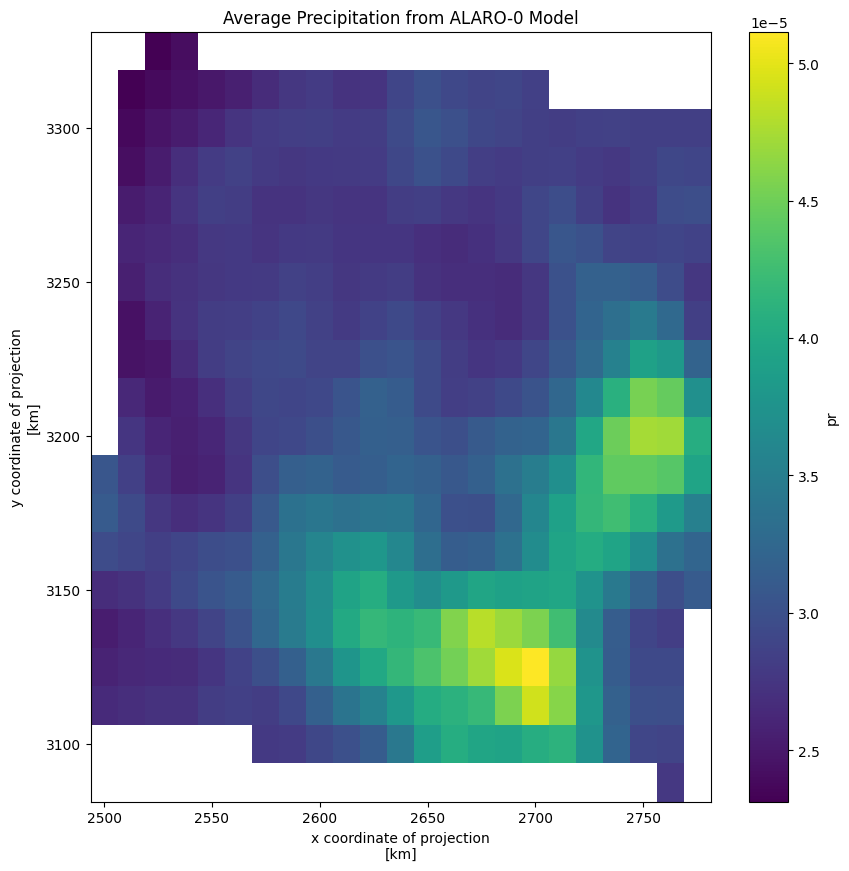

In [14]:
import matplotlib.pyplot as plt
import xarray as xr
from pathlib import Path

# Define the geographic bounding box of Belgium
min_lon, min_lat, max_lon, max_lat = 2.5, 49.5, 6.4, 51.5

# Load ALARO-0 model data
model_files = list(Path("/mnt/HDS_CORDEXBE_HUB/CORDEXBE_HUB/ALARO-0_RMIB-UGent/ncdf_GeertLenderink/ERAINT_1980_2010/").rglob("*.nc"))
alaro_ds = xr.open_mfdataset(model_files, chunks="auto")

# Ensure all data are in the same CRS (if needed, but assuming it's already EPSG:4258)
if 'crs' in alaro_ds.attrs:
    print(f"Model CRS: {alaro_ds.attrs['crs']}")

# Subset the ALARO-0 model data to cover Belgium
mask_lon = (alaro_ds.lon >= min_lon) & (alaro_ds.lon <= max_lon)
mask_lat = (alaro_ds.lat >= min_lat) & (alaro_ds.lat <= max_lat)

# Compute the masks before applying them
mask_lon = mask_lon.compute()
mask_lat = mask_lat.compute()

alaro_ds_belgium = alaro_ds.where(mask_lon & mask_lat, drop=True)

# Check the subsetted data
print(f"Subset ALARO-0 model data dimensions: {alaro_ds_belgium.dims}")
print(f"Subset ALARO-0 model data coordinates: {alaro_ds_belgium.coords}")

# Function to plot spatial distribution
def plot_spatial_distribution(data, title, cmap='viridis'):
    plt.figure(figsize=(10, 10))
    data.plot(cmap=cmap)
    plt.title(title)
    plt.show()

# Example plot for average precipitation
plot_spatial_distribution(alaro_ds_belgium['pr'].mean(dim='time'), 'Average Precipitation from ALARO-0 Model')


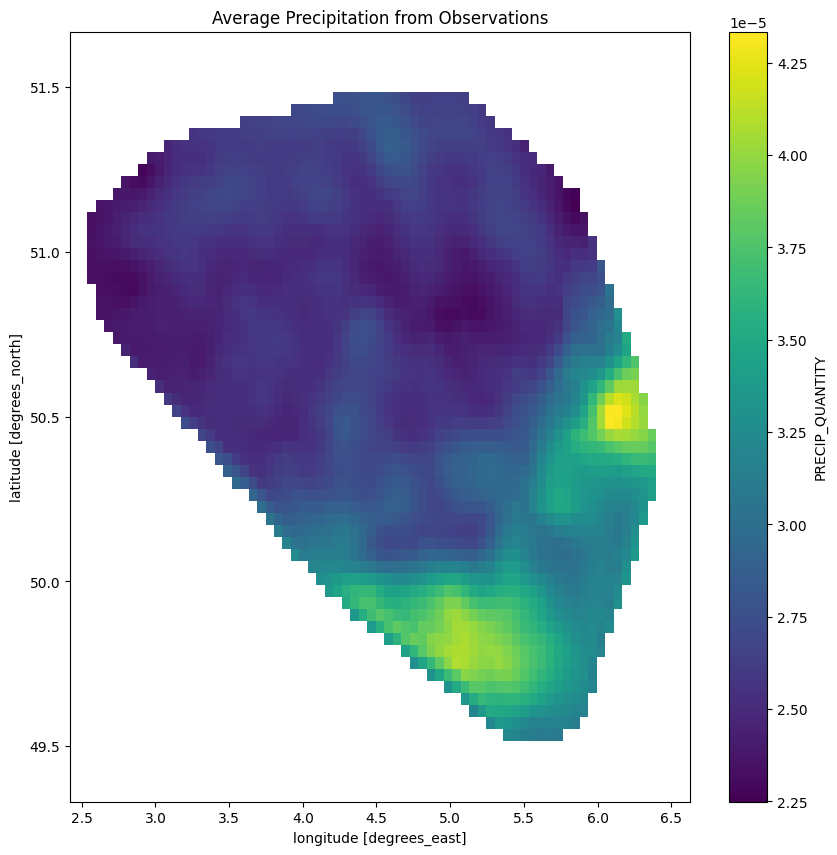

In [15]:
# Function to plot spatial distribution
def plot_spatial_distribution(data, title, cmap='viridis'):
    plt.figure(figsize=(10, 10))
    data.plot(cmap=cmap)
    plt.title(title)
    plt.show()

# Example plot for average precipitation
plot_spatial_distribution(obs_ds['PRECIP_QUANTITY'].mean(dim='time'), 'Average Precipitation from Observations')

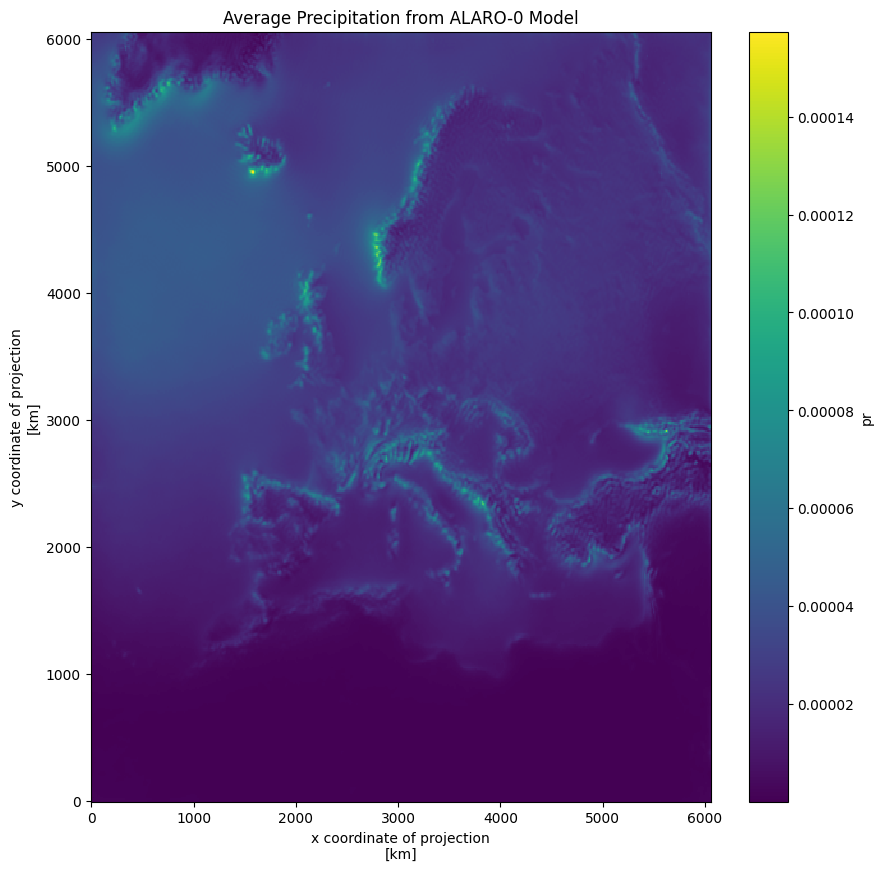

In [22]:
import matplotlib.pyplot as plt

# Plot spatial distribution of precipitation from ALARO-0 model
def plot_spatial_distribution(data, title, cmap='viridis'):
    plt.figure(figsize=(10, 10))
    data.plot(cmap=cmap)
    plt.title(title)
    plt.show()

# Example plot
plot_spatial_distribution(alaro_ds['pr'].mean(dim='time'), 'Average Precipitation from ALARO-0 Model')


In [21]:
import xarray as xr
from pathlib import Path
import numpy as np
from pyproj import Transformer
import matplotlib.pyplot as plt

# Load ALARO-0 model data
model_files = list(Path("/mnt/HDS_CORDEXBE_HUB/CORDEXBE_HUB/ALARO-0_RMIB-UGent/ncdf_GeertLenderink/ERAINT_1980_2010/").rglob("*.nc"))
alaro_ds = xr.open_mfdataset(model_files, chunks="auto")

# Load observational data
obs_ds = xr.open_mfdataset("/mnt/HDS_FORESTFLOW/FORESTFLOW/CLIMATE_GRID/SYLVAIN/Daily*.nc", chunks="auto")

# Print CRS information if available
if 'crs' in alaro_ds.attrs:
    print(f"Model CRS: {alaro_ds.attrs['crs']}")
if 'crs' in obs_ds.attrs:
    print(f"Observation CRS: {obs_ds.attrs['crs']}")

# Check grid sizes
print("ALARO-0 model grid spacing (in km):")
x_diff = np.diff(alaro_ds['x']).mean().item()
y_diff = np.diff(alaro_ds['y']).mean().item()
print(f"x spacing: {x_diff} km, y spacing: {y_diff} km")

print("Observation data grid spacing (in degrees):")
lon_diff = np.diff(obs_ds['lon']).mean().item()
lat_diff = np.diff(obs_ds['lat']).mean().item()
print(f"lon spacing: {lon_diff} degrees, lat spacing: {lat_diff} degrees")

# Define the transformer to convert from Lambert Conformal (EPSG:4258) to WGS84 (degrees)
transformer = Transformer.from_crs("EPSG:4258", "EPSG:4258", always_xy=True)

# Convert x and y coordinates (km) to lat and lon (degrees)
alaro_x_km = alaro_ds['x'].values
alaro_y_km = alaro_ds['y'].values

# Create a meshgrid for the transformation
alaro_x_km_grid, alaro_y_km_grid = np.meshgrid(alaro_x_km, alaro_y_km)

# Flatten the grids for transformation
alaro_x_km_flat = alaro_x_km_grid.flatten()
alaro_y_km_flat = alaro_y_km_grid.flatten()

# Perform the transformation from km to degrees
alaro_lon_flat, alaro_lat_flat = transformer.transform(alaro_x_km_flat * 1000, alaro_y_km_flat * 1000)  # Convert km to meters

# Reshape the transformed coordinates back to the original shape
alaro_lon = alaro_lon_flat.reshape(alaro_x_km_grid.shape)
alaro_lat = alaro_lat_flat.reshape(alaro_y_km_grid.shape)

# Assign the transformed coordinates to the dataset
alaro_ds = alaro_ds.assign_coords(lon=(["y", "x"], alaro_lon), lat=(["y", "x"], alaro_lat))

# Define the geographic bounding box of Belgium
min_lon, min_lat, max_lon, max_lat = 2.5, 49.5, 6.4, 51.5

# Subset the ALARO-0 model data to cover Belgium
mask_lon = (alaro_ds.lon >= min_lon) & (alaro_ds.lon <= max_lon)
mask_lat = (alaro_ds.lat >= min_lat) & (alaro_ds.lat <= max_lat)

alaro_ds_belgium = alaro_ds.where(mask_lon & mask_lat, drop=True)

# Check the subsetted data
print(f"Subset ALARO-0 model data dimensions: {alaro_ds_belgium.dims}")
print(f"Subset ALARO-0 model data coordinates: {alaro_ds_belgium.coords}")

# Ensure the subsetted data is not empty
if alaro_ds_belgium.dims['x'] == 0 or alaro_ds_belgium.dims['y'] == 0:
    print("The subset of the ALARO-0 model data is empty. Please check the geographic bounding box.")
else:
    # Calculate grid spacing for ALARO-0 and observation data
    alaro_lon_spacing = np.diff(alaro_ds_belgium.lon.values[0, :2])[0]
    alaro_lat_spacing = np.diff(alaro_ds_belgium.lat.values[:2, 0])[0]

    obs_lon_spacing = np.diff(obs_ds.lon.values[:2])[0]
    obs_lat_spacing = np.diff(obs_ds.lat.values[:2])[0]

    print(f"ALARO-0 model grid spacing (in degrees):")
    print(f"lon spacing: {alaro_lon_spacing} degrees, lat spacing: {alaro_lat_spacing} degrees")
    print(f"Observation data grid spacing (in degrees):")
    print(f"lon spacing: {obs_lon_spacing} degrees, lat spacing: {obs_lat_spacing} degrees")

    # Function to plot spatial distribution
    def plot_spatial_distribution(data, title, cmap='viridis'):
        plt.figure(figsize=(10, 10))
        data.plot(cmap=cmap)
        plt.title(title)
        plt.show()

    # Example plot for average precipitation
    plot_spatial_distribution(alaro_ds_belgium['pr'].mean(dim='time'), 'Average Precipitation from ALARO-0 Model')




ALARO-0 model grid spacing (in km):
x spacing: 12.5 km, y spacing: 12.5 km
Observation data grid spacing (in degrees):
lon spacing: 0.05763888690206739 degrees, lat spacing: 0.03650798494853671 degrees
Subset ALARO-0 model data dimensions: FrozenMappingWarningOnValuesAccess({'time': 543504, 'y': 0, 'x': 0, 'bnds': 2})
Subset ALARO-0 model data coordinates: Coordinates:
  * x        (x) float64 0B 
  * y        (y) float64 0B 
  * time     (time) datetime64[ns] 4MB 1980-01-01 ... 2010-12-31T23:29:59.999...
    lon      (y, x) float64 0B 
    lat      (y, x) float64 0B 
    height   float64 8B 2.0
The subset of the ALARO-0 model data is empty. Please check the geographic bounding box.


/tmp/ipykernel_2321733/2426441706.py:69: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if alaro_ds_belgium.dims['x'] == 0 or alaro_ds_belgium.dims['y'] == 0:


In [1]:
import xarray as xr
from pathlib import Path
import numpy as np
from pyproj import Transformer

# Load ALARO-0 model data
model_files = list(Path("/mnt/HDS_CORDEXBE_HUB/CORDEXBE_HUB/ALARO-0_RMIB-UGent/ncdf_GeertLenderink/ERAINT_1980_2010/").rglob("*.nc"))
alaro_ds = xr.open_mfdataset(model_files, chunks="auto")

# Load observational data
obs_ds = xr.open_mfdataset("/mnt/HDS_FORESTFLOW/FORESTFLOW/CLIMATE_GRID/SYLVAIN/Daily*.nc", chunks="auto")

# Print CRS information if available
if 'crs' in alaro_ds.attrs:
    print(f"Model CRS: {alaro_ds.attrs['crs']}")
if 'crs' in obs_ds.attrs:
    print(f"Observation CRS: {obs_ds.attrs['crs']}")

# Check grid sizes
print("ALARO-0 model grid spacing (in km):")
x_diff = np.diff(alaro_ds['x']).mean().item()
y_diff = np.diff(alaro_ds['y']).mean().item()
print(f"x spacing: {x_diff} km, y spacing: {y_diff} km")

print("Observation data grid spacing (in degrees):")
lon_diff = np.diff(obs_ds['lon']).mean().item()
lat_diff = np.diff(obs_ds['lat']).mean().item()
print(f"lon spacing: {lon_diff} degrees, lat spacing: {lat_diff} degrees")


ALARO-0 model grid spacing (in km):
x spacing: 12.5 km, y spacing: 12.5 km
Observation data grid spacing (in degrees):
lon spacing: 0.05763888690206739 degrees, lat spacing: 0.03650798494853671 degrees


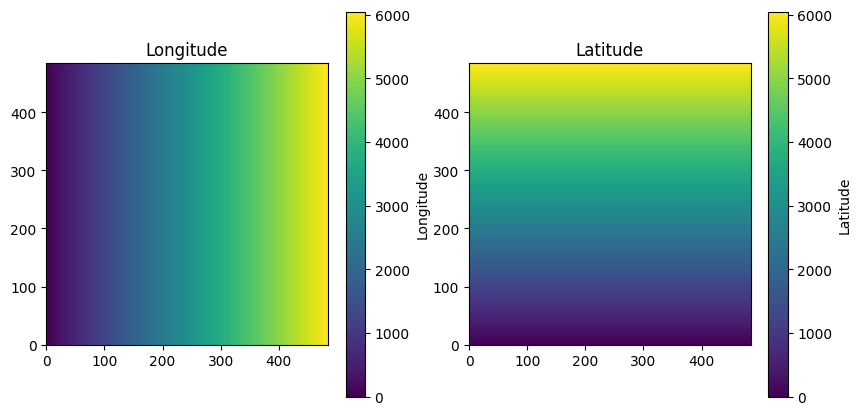

Sample lon values: [[ 0.  12.5 25.  37.5 50. ]
 [ 0.  12.5 25.  37.5 50. ]
 [ 0.  12.5 25.  37.5 50. ]
 [ 0.  12.5 25.  37.5 50. ]
 [ 0.  12.5 25.  37.5 50. ]]
Sample lat values: [[ 0.   0.   0.   0.   0. ]
 [12.5 12.5 12.5 12.5 12.5]
 [25.  25.  25.  25.  25. ]
 [37.5 37.5 37.5 37.5 37.5]
 [50.  50.  50.  50.  50. ]]
Subset ALARO-0 model data dimensions: FrozenMappingWarningOnValuesAccess({'time': 543504, 'y': 0, 'x': 0, 'bnds': 2})
Subset ALARO-0 model data coordinates: Coordinates:
  * x        (x) float64 0B 
  * y        (y) float64 0B 
  * time     (time) datetime64[ns] 4MB 1980-01-01 ... 2010-12-31T23:29:59.999...
    lon      (y, x) float64 0B 
    lat      (y, x) float64 0B 
    height   float64 8B 2.0
The subset of the ALARO-0 model data is empty. Please check the geographic bounding box.


/tmp/ipykernel_2321733/1773442950.py:99: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if alaro_ds_belgium.dims['x'] == 0 or alaro_ds_belgium.dims['y'] == 0:


In [16]:
import xarray as xr
from pyproj import CRS, Transformer
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Define the geographic bounding box of Belgium
min_lon, min_lat, max_lon, max_lat = 2.5, 49.5, 6.4, 51.5

# Load ALARO-0 model data
model_files = list(Path("/mnt/HDS_CORDEXBE_HUB/CORDEXBE_HUB/ALARO-0_RMIB-UGent/ncdf_GeertLenderink/ERAINT_1980_2010/").rglob("*.nc"))
alaro_ds = xr.open_mfdataset(model_files, chunks="auto")

# Load observational data
obs_ds = xr.open_mfdataset("/mnt/HDS_FORESTFLOW/FORESTFLOW/CLIMATE_GRID/SYLVAIN/Daily*.nc", chunks="auto")

# Explicitly assign CRS to the datasets using the provided CRS information
crs_alaro = CRS.from_wkt("""
    PROJCS["Belge 1972 / Belgian Lambert 72",
        GEOGCS["Belge 1972",
            DATUM["Reseau_National_Belge_1972",
                SPHEROID["International 1924",6378388,297,
                    AUTHORITY["EPSG","7022"]],
                TOWGS84[-106.8686,52.2978,-103.7239,0.3366,0.4569,-1.8422,1],
                AUTHORITY["EPSG","6313"]],
            PRIMEM["Greenwich",0,
                AUTHORITY["EPSG","8901"]],
            UNIT["degree",0.0174532925199433,
                AUTHORITY["EPSG","9122"]],
            AUTHORITY["EPSG","4313"]],
        UNIT["metre",1,
            AUTHORITY["EPSG","9001"]],
        PROJECTION["Lambert_Conformal_Conic_2SP"],
        PARAMETER["standard_parallel_1",49.83333333333334],
        PARAMETER["standard_parallel_2",51.16666666666666],
        PARAMETER["latitude_of_origin",90],
        PARAMETER["central_meridian",4.367486666666666],
        PARAMETER["false_easting",150000.013],
        PARAMETER["false_northing",5400088.438],
        AUTHORITY["EPSG","31370"],
        AXIS["X",EAST],
        AXIS["Y",NORTH]]
""")

crs_obs = CRS.from_wkt("""
    GEOGCS["ETRS89",
    DATUM["European_Terrestrial_Reference_System_1989",
    SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],
    AUTHORITY["EPSG","6258"]],
    PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],
    AXIS["Latitude",NORTH],
    AXIS["Longitude",EAST],
    AUTHORITY["EPSG","4258"]]
""")

# Define the transformer from Lambert Conformal Conic (LCC) to lat/lon
proj_lcc = CRS.from_user_input("EPSG:4258")  # Using EPSG:4258 for Belgian Lambert 72 projection
proj_latlon = CRS.from_user_input("EPSG:4258")  # Assuming EPSG:4258 for lat/lon projection
transformer = Transformer.from_crs(proj_lcc, proj_latlon, always_xy=True)

# Create meshgrid for ALARO-0 model coordinates
x, y = np.meshgrid(alaro_ds['x'].values, alaro_ds['y'].values)
lon, lat = transformer.transform(x, y)

# Add lon and lat as coordinates to the ALARO-0 dataset
alaro_ds = alaro_ds.assign_coords({'lon': (('y', 'x'), lon), 'lat': (('y', 'x'), lat)})

# Plot the lon and lat values to check if they are correct
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Longitude')
plt.imshow(lon, origin='lower')
plt.colorbar(label='Longitude')

plt.subplot(1, 2, 2)
plt.title('Latitude')
plt.imshow(lat, origin='lower')
plt.colorbar(label='Latitude')

plt.show()

# Print a small sample of the lon and lat values
print(f"Sample lon values: {lon[:5, :5]}")
print(f"Sample lat values: {lat[:5, :5]}")

# Subset the ALARO-0 model data to cover Belgium
mask_lon = (alaro_ds.lon >= min_lon) & (alaro_ds.lon <= max_lon)
mask_lat = (alaro_ds.lat >= min_lat) & (alaro_ds.lat <= max_lat)

# Apply the masks
alaro_ds_belgium = alaro_ds.where(mask_lon & mask_lat, drop=True)

# Check the subsetted data
print(f"Subset ALARO-0 model data dimensions: {alaro_ds_belgium.dims}")
print(f"Subset ALARO-0 model data coordinates: {alaro_ds_belgium.coords}")

# Ensure the subset is not empty
if alaro_ds_belgium.dims['x'] == 0 or alaro_ds_belgium.dims['y'] == 0:
    print("The subset of the ALARO-0 model data is empty. Please check the geographic bounding box.")
else:
    # Ensure lon and lat are coordinates
    alaro_ds_belgium = alaro_ds_belgium.assign_coords(lon=alaro_ds_belgium.lon, lat=alaro_ds_belgium.lat)

    # Regrid the ALARO-0 model to the observation grid
    alaro_ds_regridded = alaro_ds_belgium.interp(lon=obs_ds.lon, lat=obs_ds.lat, method='linear')

    # Verify regridded data dimensions and coordinates
    print(f"Regridded ALARO-0 model data dimensions: {alaro_ds_regridded.dims}")
    print(f"Regridded ALARO-0 model data coordinates: {alaro_ds_regridded.coords}")

    # Function to plot spatial distribution
    def plot_spatial_distribution(data, title, cmap='viridis'):
        plt.figure(figsize=(10, 10))
        data.plot(cmap=cmap)
        plt.title(title)
        plt.show()

    # Plot average precipitation
    plot_spatial_distribution(alaro_ds_regridded['pr'].mean(dim='time'), 'Average Precipitation from ALARO-0 Model (Regridded)')

    # Function to plot scatter plot with equality line
    def plot_scatter_with_equality_line(model_data, obs_data, title):
        plt.figure(figsize=(8, 8))
        plt.scatter(obs_data.values.flatten(), model_data.values.flatten(), alpha=0.5, label='Data points')
        plt.plot([obs_data.min(), obs_data.max()], [obs_data.min(), obs_data.max()], color='red', linestyle='--', label='Line of Equality')
        plt.xlabel('Observations')
        plt.ylabel('Model')
        plt.title(title)
        plt.legend()
        plt.show()

    # Compute mean precipitation over time
    model_precip_mean = alaro_ds_regridded['pr'].mean(dim=['time'])
    obs_precip_mean = obs_ds['PRECIP_QUANTITY'].mean(dim=['time'])

    # Example scatter plot
    plot_scatter_with_equality_line(model_precip_mean, obs_precip_mean, 'Scatter Plot of Mean Precipitation')





In [5]:
!pip install xesmf


Defaulting to user installation because normal site-packages is not writeable


Transformed longitude range: 2.3043782933419674 to 2.3898180762246195
Transformed latitude range: 49.29333536095972 to 49.3491859019116


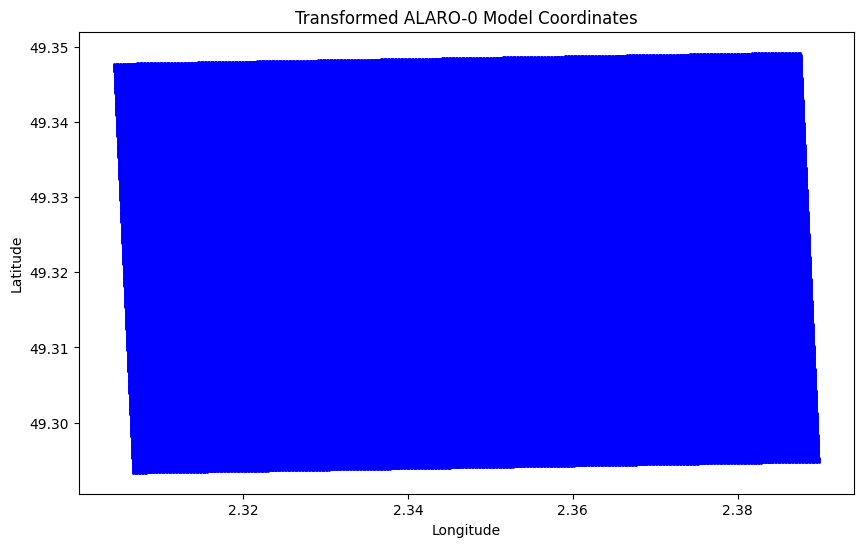

Subset ALARO-0 model data dimensions: FrozenMappingWarningOnValuesAccess({'time': 543504, 'y': 0, 'x': 0, 'bnds': 2})
Subset ALARO-0 model data coordinates: Coordinates:
  * x        (x) float64 0B 
  * y        (y) float64 0B 
  * time     (time) datetime64[ns] 4MB 1980-01-01 ... 2010-12-31T23:29:59.999...
    lon      (y, x) float64 0B 
    lat      (y, x) float64 0B 
    height   float64 8B 2.0
The subset of the ALARO-0 model data is empty. Please check the geographic bounding box.


/tmp/ipykernel_2321733/418287067.py:56: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if alaro_ds_belgium.dims['x'] == 0 or alaro_ds_belgium.dims['y'] == 0:


In [15]:
import matplotlib.pyplot as plt
import xarray as xr
from pyproj import CRS, Transformer
import numpy as np
from pathlib import Path

# Define the geographic bounding box of Belgium
min_lon, min_lat, max_lon, max_lat = 2.5, 49.5, 6.4, 51.5

# Load ALARO-0 model data
model_files = list(Path("/mnt/HDS_CORDEXBE_HUB/CORDEXBE_HUB/ALARO-0_RMIB-UGent/ncdf_GeertLenderink/ERAINT_1980_2010/").rglob("*.nc"))
alaro_ds = xr.open_mfdataset(model_files, chunks="auto")

# Load observational data
obs_ds = xr.open_mfdataset("/mnt/HDS_FORESTFLOW/FORESTFLOW/CLIMATE_GRID/SYLVAIN/Daily*.nc", chunks="auto")

# Define the transformer from Lambert Conformal Conic (LCC) to lat/lon
proj_lcc = CRS.from_user_input("EPSG:31370")  # Using EPSG:31370 for Belgian Lambert 72 projection
proj_latlon = CRS.from_user_input("EPSG:4258")  # Assuming EPSG:4258 for lat/lon projection
transformer = Transformer.from_crs(proj_lcc, proj_latlon, always_xy=True)

# Create meshgrid for ALARO-0 model coordinates
x, y = np.meshgrid(alaro_ds['x'].values, alaro_ds['y'].values)
lon, lat = transformer.transform(x, y)

# Add lon and lat as coordinates to the ALARO-0 dataset
alaro_ds = alaro_ds.assign_coords({'lon': (('y', 'x'), lon), 'lat': (('y', 'x'), lat)})

# Check the range of transformed coordinates
print(f"Transformed longitude range: {lon.min()} to {lon.max()}")
print(f"Transformed latitude range: {lat.min()} to {lat.max()}")

# Plot transformed coordinates
plt.figure(figsize=(10, 6))
plt.scatter(lon, lat, s=1, c='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Transformed ALARO-0 Model Coordinates')
plt.show()

# Subset the ALARO-0 model data to cover Belgium
mask_lon = (alaro_ds.lon >= min_lon) & (alaro_ds.lon <= max_lon)
mask_lat = (alaro_ds.lat >= min_lat) & (alaro_ds.lat <= max_lat)

# Apply the masks
alaro_ds_belgium = alaro_ds.where(mask_lon & mask_lat, drop=True)

# Check the subsetted data
print(f"Subset ALARO-0 model data dimensions: {alaro_ds_belgium.dims}")
print(f"Subset ALARO-0 model data coordinates: {alaro_ds_belgium.coords}")

# Ensure lon and lat are coordinates
alaro_ds_belgium = alaro_ds_belgium.assign_coords(lon=alaro_ds_belgium.lon, lat=alaro_ds_belgium.lat)

# Check if the subset is empty before proceeding
if alaro_ds_belgium.dims['x'] == 0 or alaro_ds_belgium.dims['y'] == 0:
    print("The subset of the ALARO-0 model data is empty. Please check the geographic bounding box.")
else:
    # Calculate grid spacing for ALARO-0 and observation data
    alaro_lon_spacing = np.diff(alaro_ds_belgium.lon.values[0, :2])[0]
    alaro_lat_spacing = np.diff(alaro_ds_belgium.lat.values[:2, 0])[0]

    obs_lon_spacing = np.diff(obs_ds.lon.values[:2])[0]
    obs_lat_spacing = np.diff(obs_ds.lat.values[:2])[0]

    print(f"ALARO-0 model grid spacing (in degrees):")
    print(f"lon spacing: {alaro_lon_spacing} degrees, lat spacing: {alaro_lat_spacing} degrees")
    print(f"Observation data grid spacing (in degrees):")
    print(f"lon spacing: {obs_lon_spacing} degrees, lat spacing: {obs_lat_spacing} degrees")

    # Function to plot spatial distribution
    def plot_spatial_distribution(data, title, cmap='viridis'):
        plt.figure(figsize=(10, 10))
        data.plot(cmap=cmap)
        plt.title(title)
        plt.show()

    # Example plot for average precipitation
    plot_spatial_distribution(alaro_ds_belgium['pr'].mean(dim='time'), 'Average Precipitation from ALARO-0 Model')


In [2]:
import matplotlib.pyplot as plt
import xarray as xr
from pathlib import Path
import numpy as np
import dask
from pyproj import Transformer

# Define the geographic bounding box of Belgium
min_lon, min_lat, max_lon, max_lat = 2.5, 49.5, 6.4, 51.5

# Load ALARO-0 model data
model_files = list(Path("/mnt/HDS_CORDEXBE_HUB/CORDEXBE_HUB/ALARO-0_RMIB-UGent/ncdf_GeertLenderink/ERAINT_1980_2010/").rglob("*.nc"))
alaro_ds = xr.open_mfdataset(model_files, chunks={'time': 1000})

# Load observational data
obs_ds = xr.open_mfdataset("/mnt/HDS_FORESTFLOW/FORESTFLOW/CLIMATE_GRID/SYLVAIN/Daily*.nc", chunks={'time': 1000})

# Print CRS information if available
if 'crs' in alaro_ds.attrs:
    print(f"Model CRS: {alaro_ds.attrs['crs']}")
if 'crs' in obs_ds.attrs:
    print(f"Observation CRS: {obs_ds.attrs['crs']}")

# Transform ALARO-0 model coordinates from Lambert Conformal Conic to lat/lon
proj_lcc = 'EPSG:3812'  # Adjust the EPSG code to the correct one if different
proj_latlon = 'EPSG:4258'
transformer = Transformer.from_crs(proj_lcc, proj_latlon, always_xy=True)

x, y = np.meshgrid(alaro_ds['x'].values, alaro_ds['y'].values)
lon, lat = transformer.transform(x, y)

alaro_ds['lon'] = (('y', 'x'), lon)
alaro_ds['lat'] = (('y', 'x'), lat)

# Subset the ALARO-0 model data to cover Belgium using lazy loading with Dask
mask_lon = (alaro_ds.lon >= min_lon) & (alaro_ds.lon <= max_lon)
mask_lat = (alaro_ds.lat >= min_lat) & (alaro_ds.lat <= max_lat)

# Subset data
alaro_ds_belgium = alaro_ds.where(mask_lon & mask_lat, drop=True).compute()

# Check the subsetted data
print(f"Subset ALARO-0 model data dimensions: {alaro_ds_belgium.dims}")
print(f"Subset ALARO-0 model data coordinates: {alaro_ds_belgium.coords}")

# Regrid the model data using xarray interpolation
alaro_ds_regridded = alaro_ds_belgium.interp(lon=obs_ds.lon, lat=obs_ds.lat, method='linear')

# Check regridded data dimensions and coordinates
print(f"Regridded ALARO-0 model data dimensions: {alaro_ds_regridded.dims}")
print(f"Regridded ALARO-0 model data coordinates: {alaro_ds_regridded.coords}")

# Function to plot spatial distribution
def plot_spatial_distribution(data, title, cmap='viridis'):
    plt.figure(figsize=(10, 10))
    data.plot(cmap=cmap)
    plt.title(title)
    plt.show()

# Example plot for average precipitation
plot_spatial_distribution(alaro_ds_regridded['pr'].mean(dim='time'), 'Average Precipitation from ALARO-0 Model (Regridded)')

# Function to plot scatter plot with equality line
def plot_scatter_with_equality_line(model_data, obs_data, title):
    plt.figure(figsize=(8, 8))
    
    plt.scatter(obs_data.values.flatten(), model_data.values.flatten(), alpha=0.5, label='Data points')
    plt.plot([obs_data.min(), obs_data.max()], [obs_data.min(), obs_data.max()], color='red', linestyle='--', label='Line of Equality')
    
    plt.xlabel('Observations')
    plt.ylabel('Model')
    plt.title(title)
    plt.legend()
    plt.show()

# Compute mean precipitation over space
model_precip_mean = alaro_ds_regridded['pr'].mean(dim=['time'])
obs_precip_mean = obs_ds['PRECIP_QUANTITY'].mean(dim=['time'])

# Example scatter plot
plot_scatter_with_equality_line(model_precip_mean, obs_precip_mean, 'Scatter Plot of Mean Precipitation')


/mnt/HDS_CORDEXBE_RMIB/kvandela/valenspy_dev/lib/python3.9/site-packages/xarray/core/indexing.py:1617: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/mnt/HDS_CORDEXBE_RMIB/kvandela/valenspy_dev/lib/python3.9/site-packages/xarray/core/indexing.py:1617: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  ret

: 

/mnt/HDS_CORDEXBE_RMIB/kvandela/valenspy_dev/lib/python3.9/site-packages/xarray/core/indexing.py:1617: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/mnt/HDS_CORDEXBE_RMIB/kvandela/valenspy_dev/lib/python3.9/site-packages/xarray/core/indexing.py:1617: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  ret

: 

## 3. Water Budget Components


# 3.a. Precipitation Analysis
3.a.I. Compare spatial patterns between model and observations:

3.a.II. Compare temporal patterns between model and observations:

In [ ]:
# Function to plot spatial precipitation
def plot_spatial_precipitation(model_data, obs_data, title):
    plt.figure(figsize=(20, 10))

    # Plot model data
    plt.subplot(1, 2, 1)
    model_data.plot(cmap='Blues')
    plt.title(f'{title} - Model')

    # Plot observation data
    plt.subplot(1, 2, 2)
    obs_data.plot(cmap='Blues')
    plt.title(f'{title} - Observations')

    plt.show()

# Example spatial plot for precipitation
model_precip = alaro_ds['pr'].mean(dim='time')
obs_precip = obs_ds['PRECIP_QUANTITY'].mean(dim='time')
plot_spatial_precipitation(model_precip, obs_precip, 'Mean Precipitation')

# Function to plot temporal precipitation
def plot_temporal_precipitation(model_data, obs_data, title):
    plt.figure(figsize=(10, 5))

    model_data.mean(dim=['x', 'y']).plot(label='Model')
    obs_data.mean(dim=['lat', 'lon']).plot(label='Observations')

    plt.title(title)
    plt.legend()
    plt.show()

# Example temporal plot for precipitation
model_precip_time = alaro_ds['pr']
obs_precip_time = obs_ds['PRECIP_QUANTITY']
plot_temporal_precipitation(model_precip_time, obs_precip_time, 'Temporal Mean Precipitation')


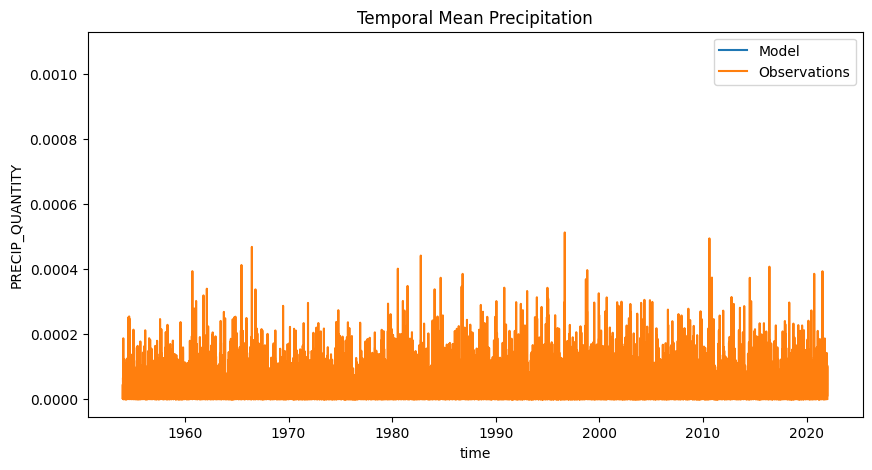

In [16]:
# Function to plot temporal precipitation
def plot_temporal_precipitation(model_data, obs_data, title):
    plt.figure(figsize=(10, 5))

    model_data.mean(dim=['x', 'y']).plot(label='Model')
    obs_data.mean(dim=['lat', 'lon']).plot(label='Observations')

    plt.title(title)
    plt.legend()
    plt.show()

# Example temporal plot for precipitation
model_precip_time = alaro_ds_belgium['pr']
obs_precip_time = obs_ds['PRECIP_QUANTITY']
plot_temporal_precipitation(model_precip_time, obs_precip_time, 'Temporal Mean Precipitation')

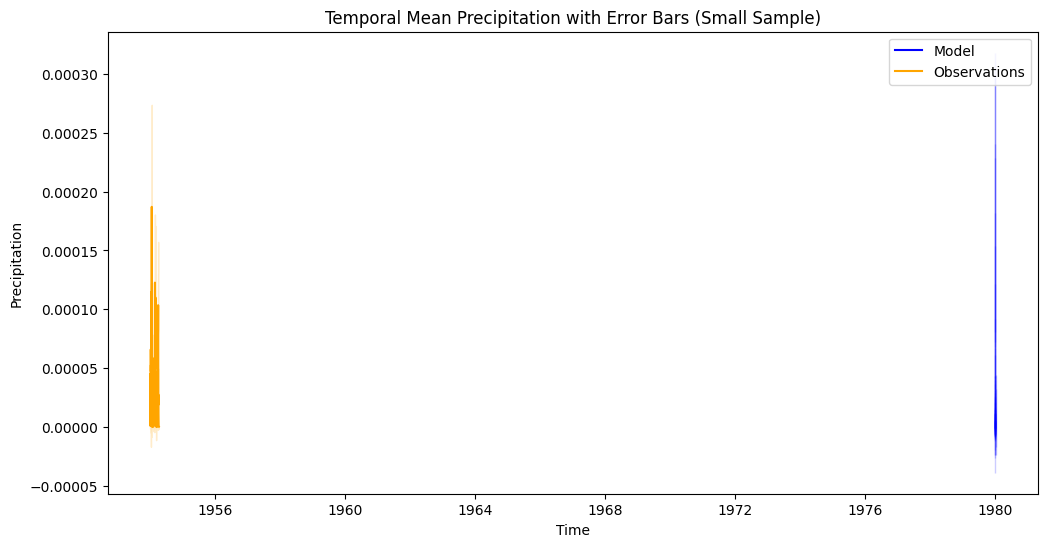

In [18]:
import matplotlib.pyplot as plt
import dask.array as da

# Function to plot temporal precipitation with error bars
def plot_temporal_precipitation_with_error(model_data, obs_data, title):
    plt.figure(figsize=(12, 6))

    # Calculate mean and standard deviation with Dask
    model_mean = model_data.mean(dim=['x', 'y']).compute()
    model_std = model_data.std(dim=['x', 'y']).compute()
    obs_mean = obs_data.mean(dim=['lat', 'lon']).compute()
    obs_std = obs_data.std(dim=['lat', 'lon']).compute()

    plt.plot(model_mean.time, model_mean, label='Model', color='blue')
    plt.fill_between(model_mean.time, model_mean - model_std, model_mean + model_std, color='blue', alpha=0.2)
    
    plt.plot(obs_mean.time, obs_mean, label='Observations', color='orange')
    plt.fill_between(obs_mean.time, obs_mean - obs_std, obs_mean + obs_std, color='orange', alpha=0.2)

    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Precipitation')
    plt.legend()
    plt.show()

# Example temporal plot for precipitation with error bars
model_precip_time = alaro_ds_belgium['pr']
obs_precip_time = obs_ds['PRECIP_QUANTITY']

# Reduce dataset size for quicker test
model_precip_time_small = model_precip_time.isel(time=slice(0, 100))
obs_precip_time_small = obs_precip_time.isel(time=slice(0, 100))

plot_temporal_precipitation_with_error(model_precip_time_small, obs_precip_time_small, 'Temporal Mean Precipitation with Error Bars (Small Sample)')



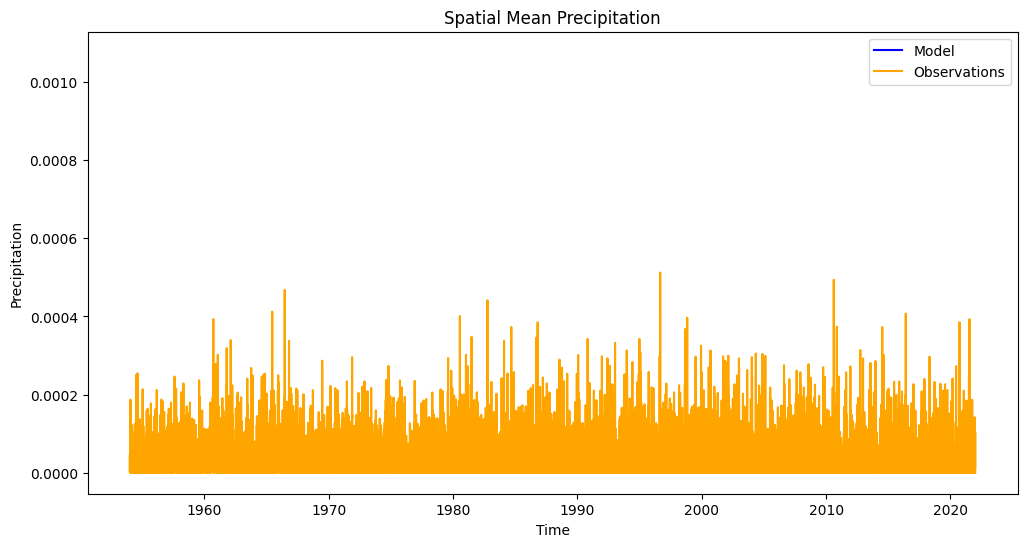

In [6]:
import matplotlib.pyplot as plt

# Function to plot spatial mean precipitation
def plot_spatial_mean_precipitation(model_data, obs_data, title):
    plt.figure(figsize=(12, 6))
    
    # Calculate spatial mean
    model_mean = model_data.mean(dim=['x', 'y'])
    obs_mean = obs_data.mean(dim=['lat', 'lon'])

    plt.plot(model_mean.time, model_mean, label='Model', color='blue')
    plt.plot(obs_mean.time, obs_mean, label='Observations', color='orange')

    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Precipitation')
    plt.legend()
    plt.show()

# Example plot for spatial mean precipitation
model_precip_time = alaro_ds_belgium['pr']
obs_precip_time = obs_ds['PRECIP_QUANTITY']
plot_spatial_mean_precipitation(model_precip_time, obs_precip_time, 'Spatial Mean Precipitation')



In [1]:
def plot_scatter_with_equality_line(model_data, obs_data, title):
    plt.figure(figsize=(8, 8))
    
    plt.scatter(obs_data.values.flatten(), model_data.values.flatten(), alpha=0.5, label='Data points')
    plt.plot([obs_data.min(), obs_data.max()], [obs_data.min(), obs_data.max()], color='red', linestyle='--', label='Line of Equality')
    
    plt.xlabel('Observations')
    plt.ylabel('Model')
    plt.title(title)
    plt.legend()
    plt.show()

# Example scatter plot
plot_scatter_with_equality_line(model_precip_time.mean(dim=['x', 'y']), obs_precip_time.mean(dim=['lat', 'lon']), 'Scatter Plot of Precipitation')


NameError: name 'model_precip_time' is not defined

ValueError: x and y must be the same size

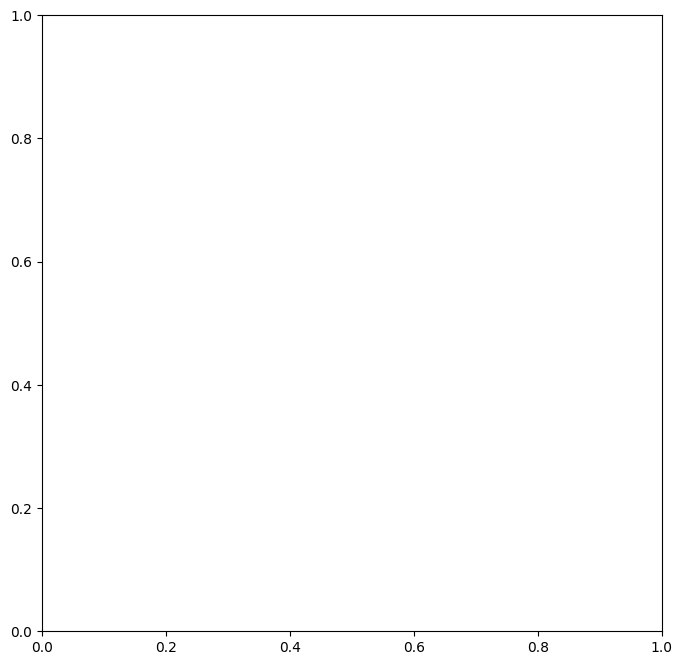

In [7]:
# Ensure the data variables are consistent
model_precip_time = alaro_ds_belgium['pr']
obs_precip_time = obs_ds['PRECIP_QUANTITY']

# Function to plot scatter plot with equality line
def plot_scatter_with_equality_line(model_data, obs_data, title):
    plt.figure(figsize=(8, 8))
    
    plt.scatter(obs_data.values.flatten(), model_data.values.flatten(), alpha=0.5, label='Data points')
    plt.plot([obs_data.min(), obs_data.max()], [obs_data.min(), obs_data.max()], color='red', linestyle='--', label='Line of Equality')
    
    plt.xlabel('Observations')
    plt.ylabel('Model')
    plt.title(title)
    plt.legend()
    plt.show()

# Example scatter plot
plot_scatter_with_equality_line(model_precip_time.mean(dim=['time']), obs_precip_time.mean(dim=['time']), 'Scatter Plot of Precipitation')

In [ ]:
def plot_distributions(model_data, obs_data, title):
    plt.figure(figsize=(12, 6))
    
    sns.kdeplot(model_data.values.flatten(), label='Model', color='blue')
    sns.kdeplot(obs_data.values.flatten(), label='Observations', color='orange')
    
    plt.title(title)
    plt.xlabel('Precipitation')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Example distribution plot
plot_distributions(model_precip_time, obs_precip_time, 'Distribution of Precipitation')


In [ ]:
def plot_bias_rmse_over_time(model_data, obs_data, title):
    plt.figure(figsize=(12, 6))

    bias = (model_data - obs_data).mean(dim=['x', 'y'])
    rmse = np.sqrt(((model_data - obs_data) ** 2).mean(dim=['x', 'y']))
    
    bias.plot(label='Bias', color='red')
    rmse.plot(label='RMSE', color='blue')
    
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Example bias and RMSE plot
plot_bias_rmse_over_time(model_precip_time, obs_precip_time, 'Bias and RMSE of Precipitation over Time')


# 3.b. Evaporation Analysis
Since I don't have direct evaporation data, you can use temperature as a proxy. Generally, higher temperatures indicate higher potential evaporation.

In [ ]:
# Function to plot spatial temperature
def plot_spatial_temperature(model_data, obs_data, title):
    plt.figure(figsize=(20, 10))

    # Plot model data
    plt.subplot(1, 2, 1)
    model_data.plot(cmap='Reds')
    plt.title(f'{title} - Model')

    # Plot observation data
    plt.subplot(1, 2, 2)
    obs_data.plot(cmap='Reds')
    plt.title(f'{title} - Observations')

    plt.show()

# Example spatial plot for temperature
model_temp = alaro_ds['tas'].mean(dim='time')
obs_temp = obs_ds['TEMP_AVG'].mean(dim='time')
plot_spatial_temperature(model_temp, obs_temp, 'Mean Temperature')

# Function to plot temporal temperature
def plot_temporal_temperature(model_data, obs_data, title):
    plt.figure(figsize=(10, 5))

    model_data.mean(dim=['x', 'y']).plot(label='Model')
    obs_data.mean(dim=['lat', 'lon']).plot(label='Observations')

    plt.title(title)
    plt.legend()
    plt.show()

# Example temporal plot for temperature
model_temp_time = alaro_ds['tas']
obs_temp_time = obs_ds['TEMP_AVG']
plot_temporal_temperature(model_temp_time, obs_temp_time, 'Temporal Mean Temperature')


# 3.c. Runoff Analysis
Runoff is typically derived from precipitation and other hydrological processes. For now, I focus on the precipitation as a proxy.

# 3.d. Balance Analysis
This analysis involves understanding the distribution and changes over time and space.

In [ ]:
# Balance Analysis: Precipitation and Temperature
def plot_balance_analysis(model_precip, model_temp, obs_precip, obs_temp):
    plt.figure(figsize=(20, 10))

    # Precipitation balance
    plt.subplot(2, 2, 1)
    model_precip.plot(cmap='Blues')
    plt.title('Model Precipitation')

    plt.subplot(2, 2, 2)
    obs_precip.plot(cmap='Blues')
    plt.title('Observed Precipitation')

    # Temperature balance
    plt.subplot(2, 2, 3)
    model_temp.plot(cmap='Reds')
    plt.title('Model Temperature')

    plt.subplot(2, 2, 4)
    obs_temp.plot(cmap='Reds')
    plt.title('Observed Temperature')

    plt.show()

# Example balance analysis plot
plot_balance_analysis(model_precip, model_temp, obs_precip, obs_temp)


## 4. Statistical Evaluation


In [ ]:
import xarray as xr
import geopandas as gpd
import rioxarray  # Ensure you import rioxarray
from pathlib import Path
import matplotlib.pyplot as plt
from xesmf import Regridder
import numpy as np
from sklearn.metrics import mean_absolute_error

# Regrid observational data to match model data grid
regridder = Regridder(obs_ds, alaro_ds, method='bilinear')
obs_regridded = regridder(obs_ds)

# Statistical metrics calculation function
def compute_statistics(model, obs):
    bias = np.mean(model - obs)
    rmse = np.sqrt(np.mean((model - obs) ** 2))
    correlation = np.corrcoef(model.flatten(), obs.flatten())[0, 1]
    mae = mean_absolute_error(obs.flatten(), model.flatten())
    std_model = np.std(model)
    std_obs = np.std(obs)
    return bias, rmse, correlation, mae, std_model, std_obs

# Compute statistics for precipitation
model_precip = alaro_ds['pr'].mean(dim='time').values
obs_precip = obs_regridded['PRECIP_QUANTITY'].mean(dim='time').values

bias, rmse, correlation, mae, std_model, std_obs = compute_statistics(model_precip, obs_precip)
print(f"Bias: {bias}, RMSE: {rmse}, Correlation: {correlation}, MAE: {mae}, Model STD: {std_model}, Observed STD: {std_obs}")

# Function to plot spatial maps of statistical metrics
def plot_spatial_metric(metric, title, belgium_gdf, dem, cmap='viridis'):
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    metric.plot(ax=ax, cmap=cmap)
    belgium_gdf.boundary.plot(ax=ax, edgecolor='black')
    dem.plot(ax=ax, cmap='terrain', alpha=0.5)  # Overlay DEM
    plt.title(title)
    plt.show()

# Compute and plot spatial bias
bias_map = alaro_ds['pr'].mean(dim='time') - obs_regridded['PRECIP_QUANTITY'].mean(dim='time')
plot_spatial_metric(bias_map, 'Spatial Bias of Precipitation', belgium_gdf, dem, cmap='coolwarm')

# Compute and plot spatial RMSE
rmse_map = np.sqrt((alaro_ds['pr'].mean(dim='time') - obs_regridded['PRECIP_QUANTITY'].mean(dim='time')) ** 2)
plot_spatial_metric(rmse_map, 'Spatial RMSE of Precipitation', belgium_gdf, dem, cmap='viridis')

# Function to plot Taylor diagram
def plot_taylor_diagram(std_obs, std_model, correlation):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, polar=True)
    
    # Taylor diagram
    theta = np.arccos(correlation)
    r = std_model / std_obs
    
    ax.plot([0, theta], [0, r], 'b-')  # Model point
    ax.plot([0, 0], [0, 1], 'k--')  # Reference point
    
    ax.set_xlabel('Correlation')
    ax.set_ylabel('Standard Deviation')
    
    ax.set_thetamin(0)
    ax.set_thetamax(90)
    ax.set_ylim(0, max(1, r) + 0.5)
    
    ax.grid(True)
    plt.title('Taylor Diagram')
    plt.show()

# Plot Taylor diagram for precipitation
plot_taylor_diagram(std_obs, std_model, correlation)

# Seasonal analysis
def compute_seasonal_statistics(model, obs, season):
    model_season = model.sel(time=model['time.season'] == season).mean(dim='time').values
    obs_season = obs.sel(time=obs['time.season'] == season).mean(dim='time').values
    return compute_statistics(model_season, obs_season)

seasons = ['DJF', 'MAM', 'JJA', 'SON']
seasonal_stats = {season: compute_seasonal_statistics(alaro_ds['pr'], obs_regridded['PRECIP_QUANTITY'], season) for season in seasons}

for season, stats in seasonal_stats.items():
    bias, rmse, correlation, mae, std_model, std_obs = stats
    print(f"Season: {season}, Bias: {bias}, RMSE: {rmse}, Correlation: {correlation}, MAE: {mae}, Model STD: {std_model}, Observed STD: {std_obs}")



## 5. Temporal Analysis


In [ ]:
# Plot time series of precipitation
def plot_time_series(data, title):
    plt.figure(figsize=(15, 5))
    data.plot()
    plt.title(title)
    plt.show()

plot_time_series(alaro_ds['pr'].mean(dim=['x', 'y']), 'Time Series of Mean Precipitation (ALARO-0)')


In [ ]:
import pandas as pd
import seaborn as sns

# Function to plot time series
def plot_time_series(data, var_name, title):
    plt.figure(figsize=(15, 5))
    data[var_name].groupby('time').mean(dim=['y', 'x']).plot()
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(var_name)
    plt.grid(True)
    plt.show()

# Example time series plot for precipitation
plot_time_series(alaro_ds, 'pr', 'Time Series of Precipitation from ALARO-0 Model')

# Function to plot seasonal cycle
def plot_seasonal_cycle(data, var_name, title):
    plt.figure(figsize=(10, 5))
    data['month'] = data['time.month']
    monthly_data = data.groupby('month').mean(dim=['time', 'y', 'x'])
    monthly_data[var_name].plot()
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel(var_name)
    plt.grid(True)
    plt.show()

# Example seasonal cycle plot for precipitation
plot_seasonal_cycle(alaro_ds, 'pr', 'Seasonal Cycle of Precipitation from ALARO-0 Model')

# Function to compute and plot anomalies
def plot_anomalies(data, var_name, title):
    clim = data.groupby('time.month').mean(dim='time')
    anomalies = data.groupby('time.month') - clim
    plt.figure(figsize=(15, 5))
    anomalies[var_name].groupby('time').mean(dim=['y', 'x']).plot()
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(f'{var_name} Anomaly')
    plt.grid(True)
    plt.show()

# Example anomalies plot for precipitation
plot_anomalies(alaro_ds, 'pr', 'Precipitation Anomalies from ALARO-0 Model')

# Function to compute and plot trends over time
def plot_trend(data, var_name, title):
    times = pd.to_datetime(data['time'].values)
    data_series = data[var_name].mean(dim=['y', 'x']).values
    trend = np.polyfit(times.astype(float), data_series, 1)
    trendline = np.polyval(trend, times.astype(float))

    plt.figure(figsize=(15, 5))
    plt.plot(times, data_series, label='Data')
    plt.plot(times, trendline, label=f'Trend (slope={trend[0]:.2e})', linestyle='--')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(var_name)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example trend plot for precipitation
plot_trend(alaro_ds, 'pr', 'Trend of Precipitation from ALARO-0 Model')

# Compare temporal evolution of model and observations
def compare_temporal_evolution(model, obs, var_name, title):
    model_series = model[var_name].groupby('time').mean(dim=['y', 'x'])
    obs_series = obs[var_name].groupby('time').mean(dim=['lat', 'lon'])
    plt.figure(figsize=(15, 5))
    model_series.plot(label='Model')
    obs_series.plot(label='Observations')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(var_name)
    plt.legend()
    plt.grid(True)
    plt.show()

# Regrid observational data to match model data grid
regridder = Regridder(obs_ds, alaro_ds, method='bilinear')
obs_regridded = regridder(obs_ds)

# Compare temporal evolution for precipitation
compare_temporal_evolution(alaro_ds, obs_regridded, 'pr', 'Temporal Evolution of Precipitation: Model vs Observations')

# Seasonal analysis
def plot_seasonal_variability(data, var_name, title):
    data_seasonal = data[var_name].groupby('time.season').mean(dim=['time', 'y', 'x'])
    data_seasonal.plot(kind='bar', figsize=(10, 5))
    plt.title(title)
    plt.xlabel('Season')
    plt.ylabel(var_name)
    plt.grid(True)
    plt.show()

# Example seasonal variability plot for precipitation
plot_seasonal_variability(alaro_ds, 'pr', 'Seasonal Variability of Precipitation from ALARO-0 Model')


## 6. Extreme Events Analysis


In [ ]:
# Identify and analyze extreme precipitation events
def identify_extreme_events(data, threshold):
    extreme_events = data.where(data > threshold, drop=True)
    return extreme_events

extreme_precip = identify_extreme_events(alaro_ds['pr'], threshold=50)
plot_time_series(extreme_precip.mean(dim=['x', 'y']), 'Extreme Precipitation Events (ALARO-0)')


## 7. Visualization and Presentation


In [ ]:
# Example 3D plot integrating topography
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_topography(data, topography, title):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    x = data['x'].values
    y = data['y'].values
    X, Y = np.meshgrid(x, y)
    Z = topography.values
    ax.plot_surface(X, Y, Z, cmap='terrain')
    plt.title(title)
    plt.show()

# Assuming 'topography' is a variable in your DEM dataset
plot_3d_topography(alaro_ds, alaro_ds['topography'], '3D Topography of Belgium')


3D plot integrating topography

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_3d_topography(data, dem, title):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    x = data['x'].values
    y = data['y'].values
    X, Y = np.meshgrid(x, y)
    Z = dem.isel(band=0).values  # Assuming DEM has a 'band' dimension
    ax.plot_surface(X, Y, Z, cmap='terrain')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    ax.set_zlabel('Elevation (m)')
    plt.show()

# Plotting 3D topography
plot_3d_topography(alaro_ds, dem, '3D Topography of Belgium')


Enhanced Visualizations

Function to plot spatial distribution with topography and borders

In [ ]:
def plot_spatial_distribution_with_context(data, title, belgium_gdf, dem, cmap='viridis'):
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    data.plot(ax=ax, cmap=cmap)
    belgium_gdf.boundary.plot(ax=ax, edgecolor='black')
    dem.plot(ax=ax, cmap='terrain', alpha=0.5)  # Overlay DEM
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Example plot for precipitation
plot_spatial_distribution_with_context(alaro_ds['pr'].mean(dim='time'), 'Average Precipitation from ALARO-0 Model', belgium_gdf, dem)


Function to plot temporal trends with enhanced context

In [ ]:
def plot_temporal_trend_with_context(data, var_name, title, belgium_gdf, dem):
    plt.figure(figsize=(15, 5))
    ax = plt.gca()
    data[var_name].groupby('time').mean(dim=['y', 'x']).plot(ax=ax)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(var_name)
    plt.grid(True)
    plt.show()

    # Plot spatial distribution for a selected time to provide context
    selected_time = data['time'].isel(time=0).values  # Change index to select different times
    plot_spatial_distribution_with_context(data.sel(time=selected_time)[var_name], f'{title} at {selected_time}', belgium_gdf, dem)

# Example plot for temporal trend of precipitation
plot_temporal_trend_with_context(alaro_ds, 'pr', 'Temporal Trend of Precipitation from ALARO-0 Model', belgium_gdf, dem)


## 8. Conclusion

### Summary of Findings
- Summarize key findings from the spatial, temporal, and statistical analyses.

### Model Performance
- Discuss the strengths and weaknesses of the ALARO-0 model in simulating the water cycle.

### Recommendations
- Provide recommendations for future improvements and potential areas of further research.


## Load in the CORDEX.be I data


In [3]:
import valenspy.cf_checks
print(dir(valenspy.cf_checks))


['CORDEX_VARIABLES', 'List', 'MAIN_METADATA', 'Path', 'Union', 'VARIABLE_METADATA', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_check_file_extension', '_check_main_metadata', '_check_variable_by_name', '_check_variable_metadata', 'file', 'files', 'is_cf_compliant', 'safe_load', 'xr']


In [6]:
import valenspy
valenspy.__file__


'/mnt/HDS_CORDEXBE_RMIB/kvandela/ValEnsPy/src/valenspy/__init__.py'

In [3]:
files= list(Path("/mnt/HDS_CORDEXBE_HUB/CORDEXBE_HUB/ALARO-0_RMIB-UGent/ncdf_GeertLenderink/ERAINT_1980_2010/").rglob("*.nc"))
alaro_ds = xr.open_mfdataset(files, chunks="auto")
alaro_ds

<xarray.Dataset> Size: 2TB
Dimensions:            (x: 485, y: 485, time: 543504, bnds: 2)
Coordinates:
  * x                  (x) float64 4kB 0.0 12.5 25.0 ... 6.038e+03 6.05e+03
  * y                  (y) float64 4kB 0.0 12.5 25.0 ... 6.038e+03 6.05e+03
  * time               (time) datetime64[ns] 4MB 1980-01-01 ... 2010-12-31T23...
    lon                (y, x) float64 2MB dask.array<chunksize=(485, 485), meta=np.ndarray>
    lat                (y, x) float64 2MB dask.array<chunksize=(485, 485), meta=np.ndarray>
    height             float64 8B 2.0
Dimensions without coordinates: bnds
Data variables:
    huss               (time, y, x) float32 511GB dask.array<chunksize=(284, 485, 485), meta=np.ndarray>
    Lambert_Conformal  (time) object 4MB b'' b'' b'' b'' b'' ... b'' b'' b'' b''
    pr                 (time, y, x) float32 511GB dask.array<chunksize=(285, 485, 485), meta=np.ndarray>
    time_bnds          (time, bnds) datetime64[ns] 9MB dask.array<chunksize=(17569, 2), meta=np.ndarray>
    ps                 (time, y, x) float32 511GB dask.array<chunksize=(284, 485, 485), meta=np.ndarray>
    tas                (time, y, x) float32 511GB dask.array<chunksize=(284, 485, 485), meta=np.ndarray>
Attributes: (12/24)
    institute_id:                   RMIB-UGent
    model_id:                       RMIB-UGent-ALARO-0
    experiment_id:                  evaluation
    product:                        output
    Conventions:                    CF-1.6
    driving_model_id:               ECMWF-ERAINT
    ...                             ...
    endtime:                        347151600.0
    frequency:                      1hr
    creation_date:                  2019-01-30T21:07:50Z
    tracking_id:                    fce1ee51-5cab-4ff6-8bc5-ffca160ea1c3
    driving_experiment:             ECMWF-ERAINT, evaluation, r1i1p1
    history:                        Created by CordextractR v1.9-84-g0054a8f

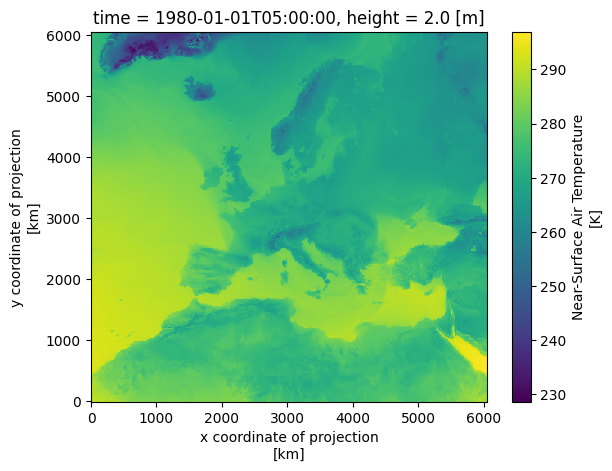

In [4]:
alaro_ds.tas.isel(time=10).plot()

# Load in the Observational data

In [5]:
ds = xr.open_mfdataset("/mnt/HDS_FORESTFLOW/FORESTFLOW/CLIMATE_GRID/SYLVAIN/Daily*.nc", chunks="auto")
ds

<xarray.Dataset> Size: 4GB
Dimensions:          (time: 24837, lat: 64, lon: 73)
Coordinates:
  * lon              (lon) float64 584B 2.45 2.508 2.565 ... 6.485 6.542 6.6
  * lat              (lat) float64 512B 49.35 49.39 49.42 ... 51.58 51.61 51.65
  * time             (time) datetime64[ns] 199kB 1954-01-01 ... 2021-12-31
Data variables:
    PRECIP_QUANTITY  (time, lat, lon) float64 928MB dask.array<chunksize=(365, 64, 73), meta=np.ndarray>
    TEMP_AVG         (time, lat, lon) float64 928MB dask.array<chunksize=(365, 64, 73), meta=np.ndarray>
    TEMP_MAX         (time, lat, lon) float64 928MB dask.array<chunksize=(365, 64, 73), meta=np.ndarray>
    TEMP_MIN         (time, lat, lon) float64 928MB dask.array<chunksize=(365, 64, 73), meta=np.ndarray>
Attributes:
    Creators:                     Ghilain N., Van Schaeybroeck B., Marchi S.
    Version:                      1.1
    Affiliation:                  Royal Meteorological Institute of Belgium
    Url:                          https://opendata.meteo.be/geonetwork/srv/en...
    Coordinate reference system:  EPSG:4258
    Identifier:                   RMI_DATASET_GRIDDEDOBS

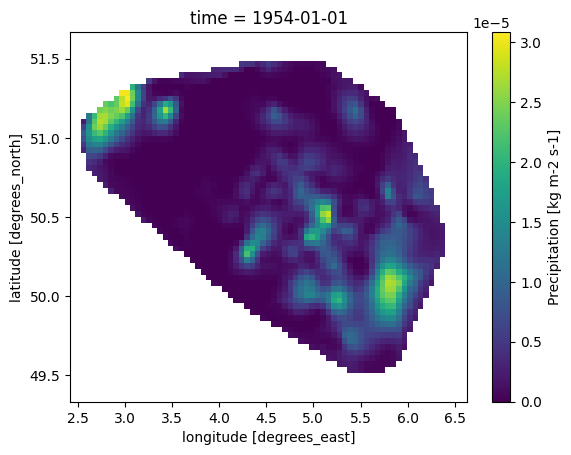

In [6]:
#plot the first time step for Precipitation
ds.PRECIP_QUANTITY.isel(time=0).plot()

## CF Checker

## What is checked?

In Valenspy, the self implemented CF conventions checker checks the following:

- The global attributes `history` and `Conventions` are present.
- Per variable the attributes `standard_name`, `long_name` & `units` are present.
- Checks if the file is a netCDF file.

In addition the cf_checker compares the variables in the file with the CORDEX_variables.yml file. 
If the variable is in the CORDEX_variables.yml file, the checker will check if the variable has the correct attributes.

In [2]:
# Perform CF compliance check on the model dataset
model_cf_compliant = vp.cf_checks.is_cf_compliant(alaro_ds)

# Perform CF compliance check on the observational dataset
obs_cf_compliant = vp.cf_checks.is_cf_compliant(ds)
print(model_cf_compliant)
print(obs_cf_compliant)

NameError: name 'alaro_ds' is not defined

In [5]:
cf_status(alaro_ds) 
cf_status(ds) # A path or a dataset can be passed - here we pass the dataset

NameError: name 'cf_status' is not defined

## Temporal Analysis

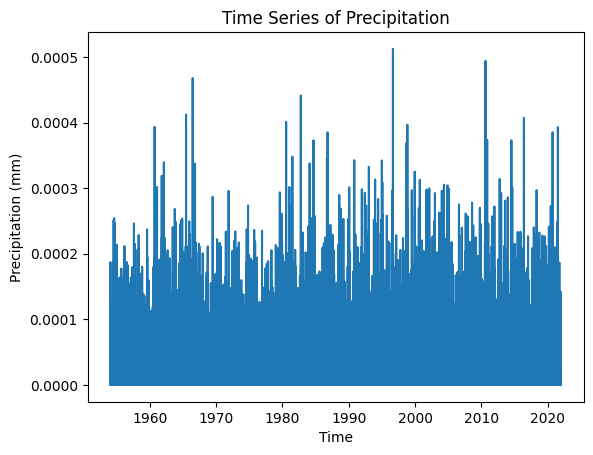

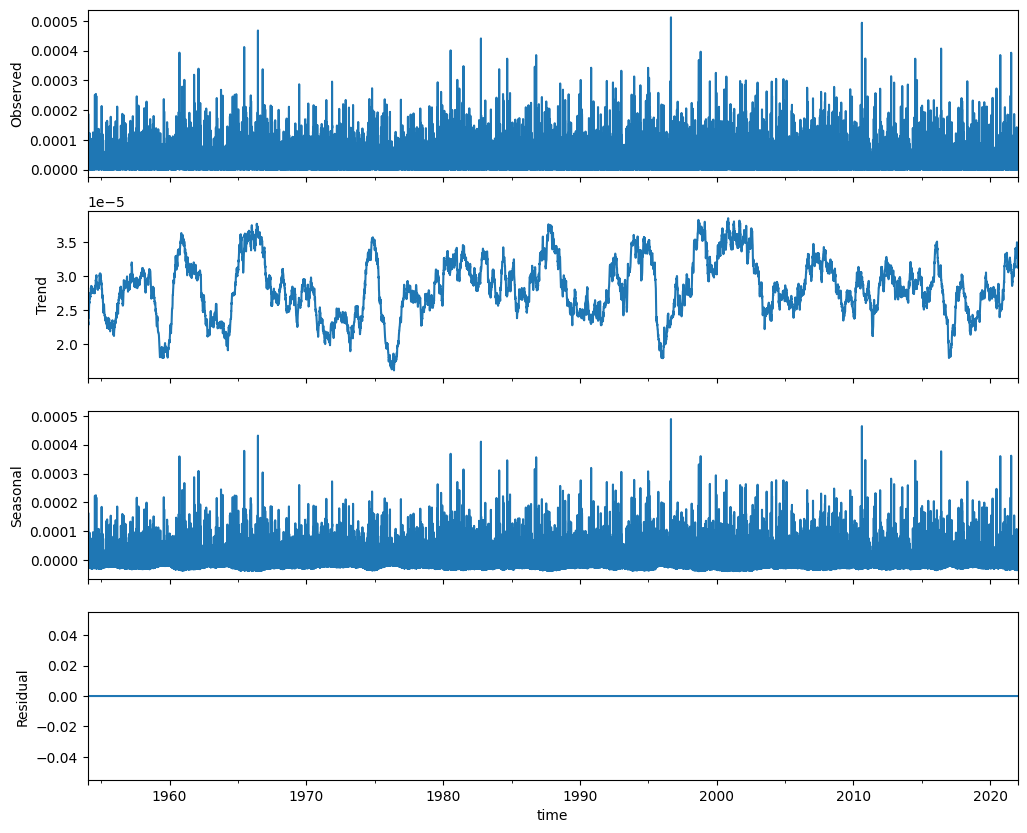

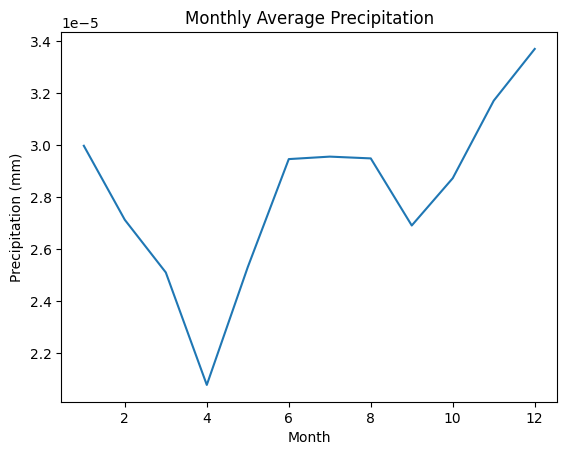

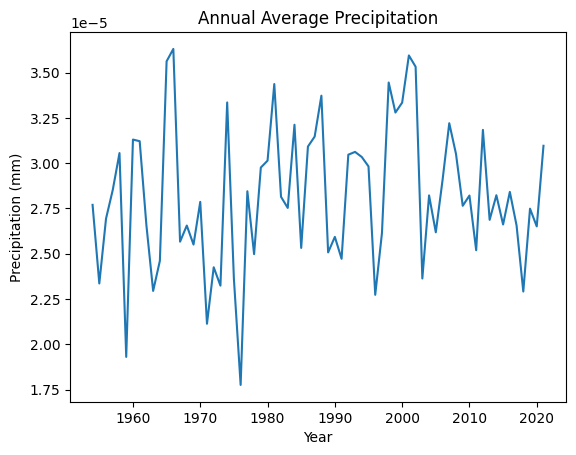

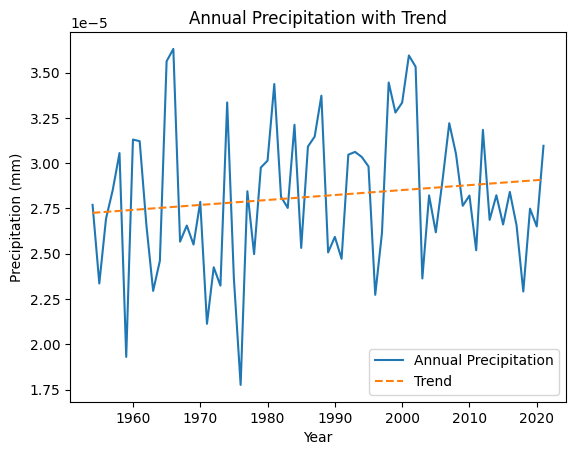

In [110]:
# Imports
from pathlib import Path
from datatree import DataTree
import dask
import xarray as xr
import pandas as pd
import valenspy as vp
import numpy as np
import matplotlib.pyplot as plt

# Compute the mean over lat and lon
precip_ts = ds.PRECIP_QUANTITY.mean(dim=['lat', 'lon'])

# Trigger computation explicitly
precip_ts = precip_ts.compute()

# Plot the time series of precipitation
precip_ts.plot()
plt.title('Time Series of Precipitation')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm)')
plt.show()

# Convert to pandas Series
precip_ts_pd = precip_ts.to_series()

# Perform seasonal decomposition using pandas
decomposition = precip_ts_pd.resample('D').mean().dropna().interpolate()

# Decompose the time series
decomposed = decomposition.to_frame(name='precipitation')
decomposed['trend'] = decomposed['precipitation'].rolling(window=365, center=True, min_periods=120).mean()
decomposed['seasonal'] = decomposed['precipitation'] - decomposed['precipitation'].rolling(window=365, center=True, min_periods=120).mean()
decomposed['residual'] = decomposed['precipitation'] - decomposed['trend'] - decomposed['seasonal']

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
decomposed['precipitation'].plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposed['trend'].plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposed['seasonal'].plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposed['residual'].plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.show()

# Monthly and annual average precipitation
precip_monthly = precip_ts.groupby('time.month').mean()
precip_monthly.plot()
plt.title('Monthly Average Precipitation')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.show()

precip_annual = precip_ts.groupby('time.year').mean()
precip_annual.plot()
plt.title('Annual Average Precipitation')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.show()

# Trend analysis
trend_precip = precip_annual.polyfit(dim='year', deg=1)
trend_precip_poly = xr.polyval(precip_annual['year'], trend_precip.polyfit_coefficients)
precip_annual.plot(label='Annual Precipitation')
trend_precip_poly.plot(label='Trend', linestyle='--')
plt.legend()
plt.title('Annual Precipitation with Trend')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.show()



## Spatial Analysis

## Extreme Events Analysis


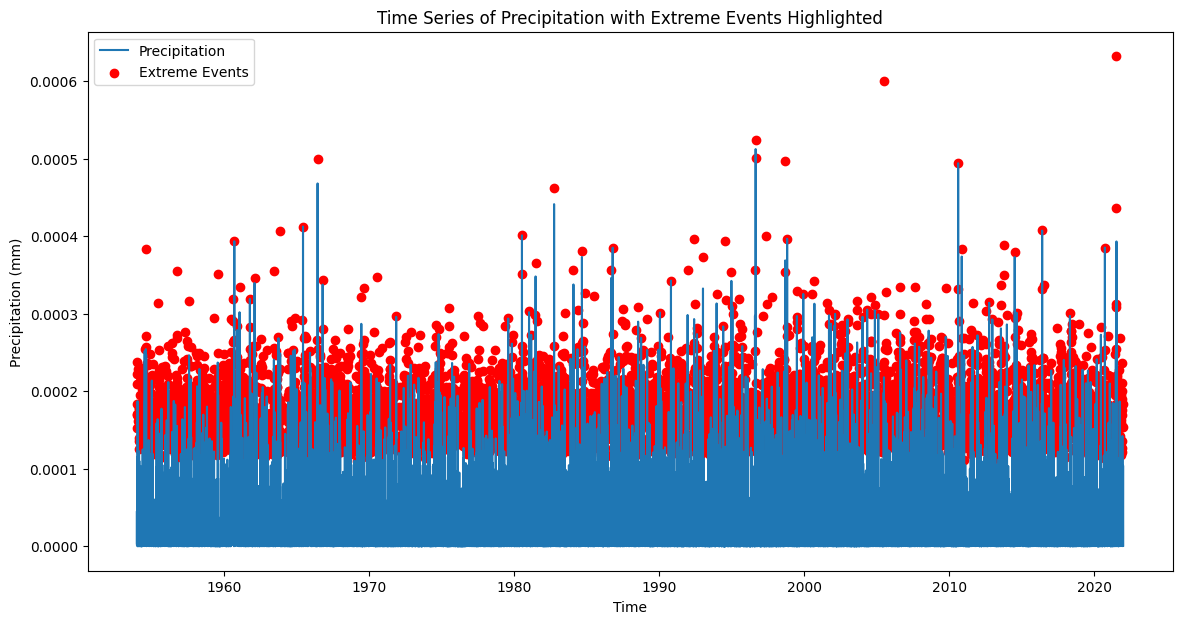

In [111]:
# Rechunk the data along the time dimension
ds_rechunked = ds.PRECIP_QUANTITY.chunk({'time': -1})

# Compute the 95th percentile for each grid point
quantile_95 = ds_rechunked.quantile(0.95, dim='time')

# Identify extreme events
extreme_events = ds_rechunked.where(ds_rechunked > quantile_95)

# Convert extreme events to a pandas DataFrame
extreme_events_ts = extreme_events.mean(dim=['lat', 'lon']).to_series()

# Plot the time series of precipitation with extreme events highlighted
plt.figure(figsize=(14, 7))
plt.plot(precip_ts_pd.index, precip_ts_pd, label='Precipitation')
plt.scatter(extreme_events_ts.index, extreme_events_ts, color='red', label='Extreme Events', marker='o')
plt.title('Time Series of Precipitation with Extreme Events Highlighted')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

In [ ]:
# Compute the return period for extreme events
quantile_95 = ds.PRECIP_QUANTITY.chunk({'time': -1}).quantile(0.95, dim='time')
extreme_counts = ds.PRECIP_QUANTITY.where(ds.PRECIP_QUANTITY > quantile_95).count(dim='time')
return_periods = (len(ds.time) / extreme_counts).where(extreme_counts > 0)

return_periods.plot()
plt.title('Return Periods of Extreme Precipitation Events')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
# Compute consecutive rainy days
rainy_days = (ds.PRECIP_QUANTITY > 0).astype(int)
consecutive_rainy_days = rainy_days.rolling(time=7, min_periods=1).sum()

# Plot consecutive rainy days for a specific time step
time_step = 0  # Choose a specific time step to visualize
plt.figure(figsize=(10, 8))
consecutive_rainy_days.isel(time=time_step).plot(cmap='Blues')
plt.title(f'Consecutive Rainy Days at Time Step {time_step}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
# Define a threshold for drought (e.g., below 5th percentile of precipitation)
drought_threshold = ds.PRECIP_QUANTITY.chunk({'time': -1}).quantile(0.05, dim='time')

# Identify drought events
drought_events = ds.PRECIP_QUANTITY.where(ds.PRECIP_QUANTITY < drought_threshold)

# Compute consecutive dry days
dry_days = (ds.PRECIP_QUANTITY < drought_threshold).astype(int)
consecutive_dry_days = dry_days.rolling(time=7, min_periods=1).sum()

# Plot drought events and consecutive dry days for a specific time step
time_step = 0  # Choose a specific time step to visualize
plt.figure(figsize=(10, 8))
drought_events.isel(time=time_step).plot(cmap='Reds')
plt.title(f'Drought Events at Time Step {time_step}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

plt.figure(figsize=(10, 8))
consecutive_dry_days.isel(time=time_step).plot(cmap='Reds')
plt.title(f'Consecutive Dry Days at Time Step {time_step}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


## Statistics

In [ ]:
# Rechunk the data along the time dimension
ds_rechunked = ds.PRECIP_QUANTITY.chunk({'time': -1})

# Compute the mean and standard deviation of precipitation over time
precip_mean = ds_rechunked.mean(dim='time')
precip_std = ds_rechunked.std(dim='time')

# Compute anomalies (deviation from mean)
precip_anomaly = ds_rechunked - precip_mean

# Plot the mean precipitation spatially
plt.figure(figsize=(10, 8))
precip_mean.plot(cmap='Blues')
plt.title('Mean Precipitation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Plot the standard deviation of precipitation spatially
plt.figure(figsize=(10, 8))
precip_std.plot(cmap='Reds')
plt.title('Standard Deviation of Precipitation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Plot the anomalies for a specific time step
time_step = 0  # Choose a specific time step to visualize
plt.figure(figsize=(10, 8))
precip_anomaly.isel(time=time_step).plot(cmap='RdBu', center=0)
plt.title(f'Precipitation Anomalies at Time Step {time_step}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



In [ ]:
from scipy.stats import pearsonr
import numpy as np

# Ensure data alignment for statistical metrics calculation
model_temp = alaro_ds.tas.mean(dim=['y', 'x'])
obs_temp = ds.TEMP_AVG.mean(dim=['lat', 'lon'])

# Compute bias, RMSE, and correlation coefficient
bias = np.mean(model_temp - obs_temp)
rmse = np.sqrt(np.mean((model_temp - obs_temp)**2))
correlation, _ = pearsonr(model_temp.values.flatten(), obs_temp.values.flatten())

print(f'Bias: {bias}')
print(f'RMSE: {rmse}')
print(f'Correlation: {correlation}')

# Taylor diagram function
def taylor_diagram(stddev, correlation, ax):
    ax.plot(correlation * stddev, stddev, 'o', markersize=10)
    ax.annotate(f"Bias: {bias:.2f}\nRMSE: {rmse:.2f}\nCorr: {correlation:.2f}", 
                (correlation * stddev, stddev), textcoords="offset points", xytext=(10,-10), ha='center')

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
taylor_diagram(np.std(model_temp), correlation, ax)
plt.show()


## Water Budget Components

In [ ]:
# Compute the components of the water budget
precip = alaro_ds.pr
evaporation = alaro_ds.evspsbl
runoff = alaro_ds.mrro

# Calculate the water budget (precipitation - evaporation - runoff)
water_budget = precip - evaporation - runoff

# Plot the water budget components
plt.figure(figsize=(12, 6))
precip.isel(time=0).plot(label='Precipitation')
evaporation.isel(time=0).plot(label='Evaporation')
runoff.isel(time=0).plot(label='Runoff')
water_budget.isel(time=0).plot(label='Water Budget', linestyle='--')
plt.legend()
plt.title('Water Budget Components (First Time Step)')
plt.show()

# Analyze the balance and changes over time and space
water_budget_mean = water_budget.mean(dim=['x', 'y'])
water_budget_mean.plot()
plt.title('Mean Water Budget Over Time')
plt.show()


# Subset: temporal

In [ ]:
import xarray as xr
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
model_files = list(Path("/mnt/HDS_CORDEXBE_HUB/CORDEXBE_HUB/ALARO-0_RMIB-UGent/ncdf_GeertLenderink/ERAINT_1980_2010/").rglob("*.nc"))
alaro_ds = xr.open_mfdataset(model_files, chunks="auto")

obs_files = "/mnt/HDS_FORESTFLOW/FORESTFLOW/CLIMATE_GRID/SYLVAIN/Daily*.nc"
obs_ds = xr.open_mfdataset(obs_files, chunks="auto")

# Define the subset region and time period
subset_lat = slice(49, 50)  # Subset latitude range
subset_lon = slice(2, 3)    # Subset longitude range
subset_time = slice('1980-01-01', '1980-12-31')  # Subset time range

# Create subsets for the model and observation datasets
model_subset = alaro_ds.sel(y=subset_lat, x=subset_lon, time=subset_time)
obs_subset = obs_ds.sel(lat=subset_lat, lon=subset_lon, time=subset_time)

# Ensure the time dimensions match
common_times = obs_subset.time.values
model_subset = model_subset.sel(time=common_times)

# Print the subset to verify
print(model_subset)
print(obs_subset)



<xarray.DataArray 'tas' (time: 366)> Size: 1kB
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, 

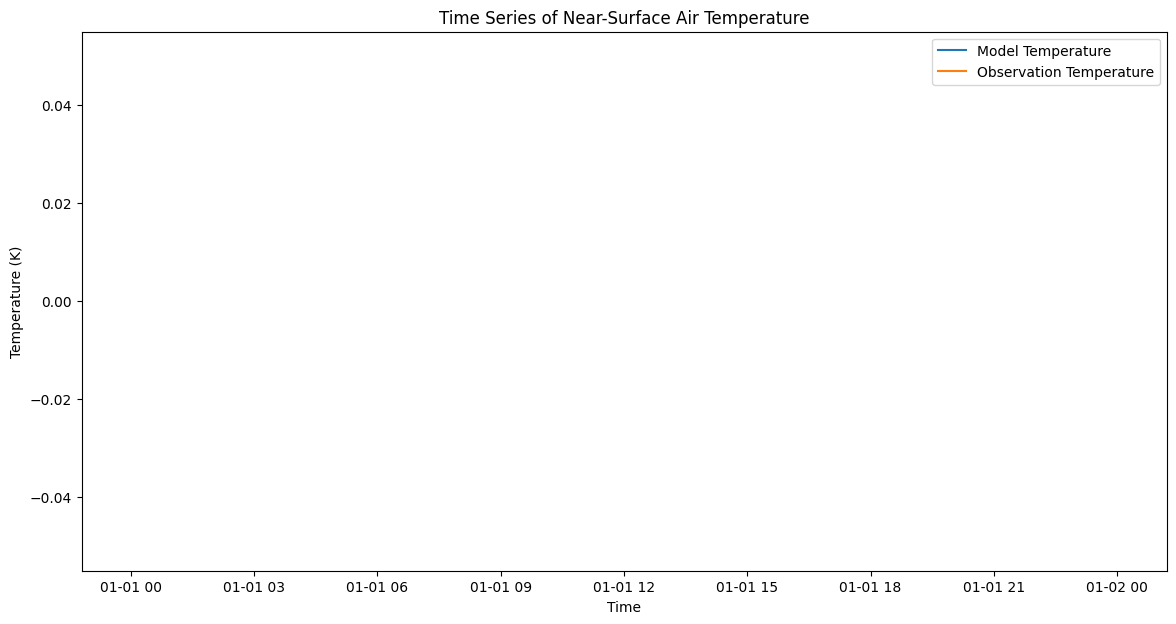

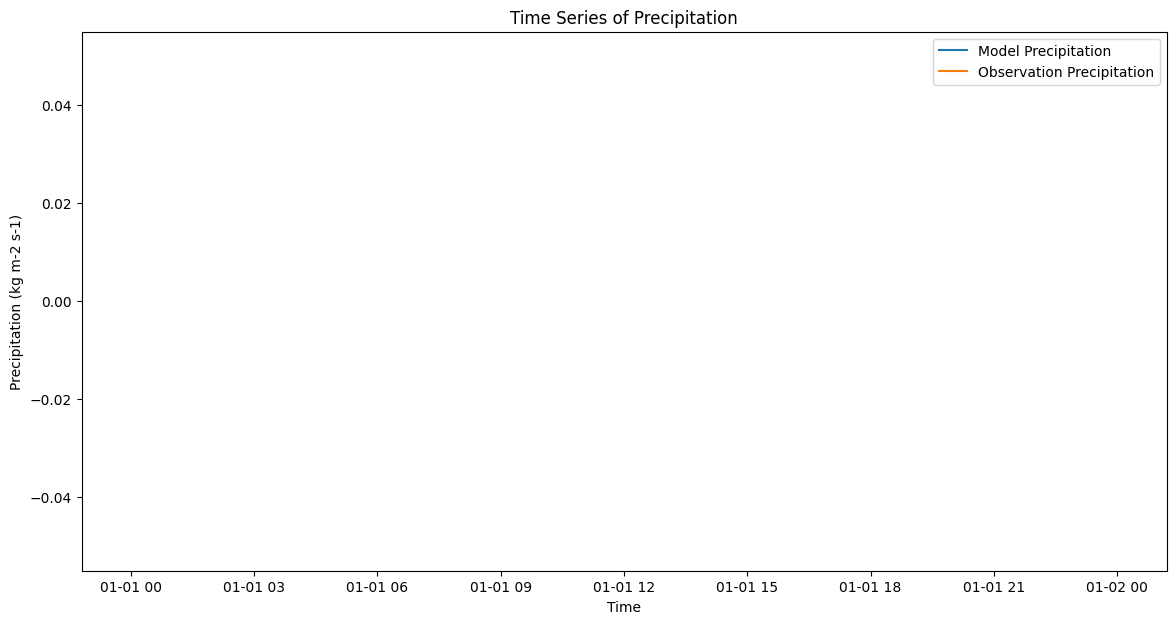

In [99]:

# Compute the mean over lat and lon for model data
model_temp_ts = model_subset.tas.mean(dim=['y', 'x'])
model_precip_ts = model_subset.pr.mean(dim=['y', 'x'])

# Compute the mean over lat and lon for observational data
obs_temp_ts = obs_subset.TEMP_AVG.mean(dim=['lat', 'lon'])
obs_precip_ts = obs_subset.PRECIP_QUANTITY.mean(dim=['lat', 'lon'])

# Trigger computation explicitly
model_temp_ts = model_temp_ts.compute()
model_precip_ts = model_precip_ts.compute()
obs_temp_ts = obs_temp_ts.compute()
obs_precip_ts = obs_precip_ts.compute()
print(model_temp_ts)
print(model_temp_ts.time)
# Plot the time series of temperature
plt.figure(figsize=(14, 7))
plt.plot(model_temp_ts.time, model_temp_ts, label='Model Temperature')
plt.plot(obs_temp_ts.time, obs_temp_ts, label='Observation Temperature')
plt.title('Time Series of Near-Surface Air Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature (K)')
plt.legend()
plt.show()

# Plot the time series of precipitation
plt.figure(figsize=(14, 7))
plt.plot(model_precip_ts.time, model_precip_ts, label='Model Precipitation')
plt.plot(obs_precip_ts.time, obs_precip_ts, label='Observation Precipitation')
plt.title('Time Series of Precipitation')
plt.xlabel('Time')
plt.ylabel('Precipitation (kg m-2 s-1)')
plt.legend()
plt.show()


# Subset: Spatial Analysis

# Subset: Statistical Evaluation

# Subset: seasonal and interannual 

Subset: EE

Drought Analysis

Water Budget Components